<a href="https://colab.research.google.com/github/Julio-Garces/test/blob/main/Risk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Limpieza de Datos**

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Risk management projects/Dataset/Data para Risk Managment/CreditRisk.csv')

In [4]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [5]:
df.describe().round()
#Solo describe las variables numericas mas no string
#comparamos la media con la mediana, si hay mucha diferencia hay datos atipicos o por un tema de mal registro.
# Por ejemplo, en income hay una gran diferencia. Cuando no ves informacion aveces se llena  con un 99999999 haciendo referencia a que no se encuentra con esa informacion,
# del mismo modo con otras variables.

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


Reemplazamos los valores 9999999 por valores missing (np.nan) en las columnas income ,assets, debt

In [6]:
for c in ['income','assets','debt']:
    df[c]=df[c].replace(to_replace=99999999,value=np.nan)

Analizamos la variable dependiente

In [7]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [8]:
#OK no entro en default, default, y unk no sabe que es

In [9]:
#Eliminar valor desconocido
df=df[df.status != 'unk']

Analizamos los valores nulos

In [10]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

Completando valores nulos

In [11]:
income_median=df['income'].median()
assets_median=df['assets'].median()
debt_median=df['debt'].median()

df['income'].fillna(income_median, inplace= True)
df['assets'].fillna(assets_median, inplace=True)
df['debt'].fillna(debt_median, inplace=True)
df.isnull().sum
# Se reemplaza mejor con la mediana que con la media dado que absorverias el impacto de los valores
#extremos y lo harias sesgado.

<ipython-input-11-6519f5cad9c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'].fillna(income_median, inplace= True)
<ipython-input-11-6519f5cad9c6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['assets'].fillna(assets_median, inplace=True)
<ipython-input-11-6519f5cad9c6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['debt'].fillna(debt_median, inplace=True)


<bound method NDFrame._add_numeric_operations.<locals>.sum of       status  seniority   home   time    age  marital  records    job  \
0      False      False  False  False  False    False    False  False   
1      False      False  False  False  False    False    False  False   
2      False      False  False  False  False    False    False  False   
3      False      False  False  False  False    False    False  False   
4      False      False  False  False  False    False    False  False   
...      ...        ...    ...    ...    ...      ...      ...    ...   
4450   False      False  False  False  False    False    False  False   
4451   False      False  False  False  False    False    False  False   
4452   False      False  False  False  False    False    False  False   
4453   False      False  False  False  False    False    False  False   
4454   False      False  False  False  False    False    False  False   

      expenses  income  assets   debt  amount  price  
0     

In [12]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


Variable Dependiente

In [13]:
print(df['status'].value_counts())
# Las variables se recomiendan hacer en forma numerica cuando haces machine learning en python

ok         3200
default    1254
Name: status, dtype: int64


In [14]:
#cambiamos los default==1 y ok==0
default=pd.get_dummies(df['status'])
default
#Hemos creado una variable default en dummies

,default,ok
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
4450,1,0
4451,0,1
4452,1,0
4453,0,1


In [15]:
df=pd.concat([default,df],axis=1)
df

,default,ok,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,1,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,0,1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,1,0,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,0,1,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,0,1,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,1,0,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4451,0,1,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4452,1,0,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4453,0,1,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [16]:
#la variable concat agrega la dummi default al dataframe df
df=df.drop(['ok','status'],axis=1)
df.head()

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,0,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,1,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,0,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,0,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [17]:
df['default'].mean()
#eliminamos ok y status para poder analizar los default eliminamos con drop

0.2815446789402784

In [18]:
#28% de clientes que son morosos

**Division de la Data en Train-Test-Validation**


*   Dividimos la data en train-validation-test
*   Primero dividimos en train_full test y luego train full dividimos en train y validation



In [19]:
#Si yo tengo una base de datos la cual dividimos en 2 grupos para train y el otro para test, el test probabas como se comportaba la data con informacion nueva.
#Dividir la data train en train y validacion . Lo cual entrenamos el modelo con la data de train con lo cual creamos el modelo, pero con la data de validazion optimizamos
#los parametros atravez de una validacion. Entrenamos al modelo para obtimizar el modelo entrenandolo y lo optimizamos con la validacion.
#Ejemplo analogico: Al tener un examen de mate, Si agarras un libro las notas de los libros con lo cual existen ejercicios resueltos(train) dado que aprtir de estos ejercicios
#vas a saber como resolver. Los libros tienen ejercicios propuestos(validacion) una vez entendido lo propuesto ejercita lo que sabes dado que hay respuestas que ya vienen del data
#train. Entreno luego lo valido, es como repasar ejercicios resueltos y pones aprueba lo que sabes con los ejercicios propuestos. El examen es la data test porque no sabes lo que va a pasar
#pero ya estas entrenado , la variable y es desconocida.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_train_full,df_test= train_test_split(df,test_size=0.2,random_state=100)
df_train, df_val=train_test_split(df_train_full,test_size=0.25, random_state=100)


In [22]:
len(df_train) , len(df_val), len(df_test)

(2672, 891, 891)

In [23]:
df_train

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3580,1,1,rent,36,37,married,no,partime,75,145.0,0.0,0.0,1100,1871
2355,0,20,owner,60,41,married,no,fixed,75,186.0,8000.0,50.0,900,1700
3889,0,0,owner,60,47,married,no,freelance,45,56.0,6000.0,0.0,1345,1345
79,0,29,owner,48,56,married,no,fixed,45,100.0,3000.0,0.0,900,1360
1172,0,4,rent,6,28,married,no,fixed,66,60.0,0.0,0.0,200,1566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,0,15,owner,36,47,married,no,fixed,75,289.0,3500.0,0.0,1500,2154
2323,0,10,rent,48,26,single,no,fixed,52,169.0,2000.0,0.0,1000,1242
2173,0,4,rent,60,21,single,no,fixed,47,120.0,8000.0,0.0,2100,2100
665,0,6,rent,60,26,married,no,fixed,60,150.0,0.0,0.0,1200,1376


**Analisis Exploratorio de los datos**

Variables Categoricas

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2672 entries, 3580 to 1086
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   default    2672 non-null   uint8  
 1   seniority  2672 non-null   int64  
 2   home       2672 non-null   object 
 3   time       2672 non-null   int64  
 4   age        2672 non-null   int64  
 5   marital    2672 non-null   object 
 6   records    2672 non-null   object 
 7   job        2672 non-null   object 
 8   expenses   2672 non-null   int64  
 9   income     2672 non-null   float64
 10  assets     2672 non-null   float64
 11  debt       2672 non-null   float64
 12  amount     2672 non-null   int64  
 13  price      2672 non-null   int64  
dtypes: float64(3), int64(6), object(4), uint8(1)
memory usage: 294.9+ KB


In [25]:
var_categoricas=['home','marital','records','job']
var_numericas=['seniority','time','age','expenses','income','assets','debt','amount','price']
#vARIABLES CATEGORICAS SON LAS QUE TIENEN OBJETOS, Y NUMERICOS SON  INT O FLOAT

Frecuencia de default por var categorica

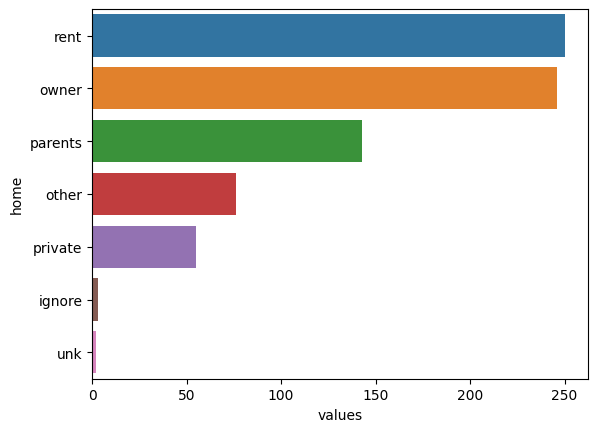

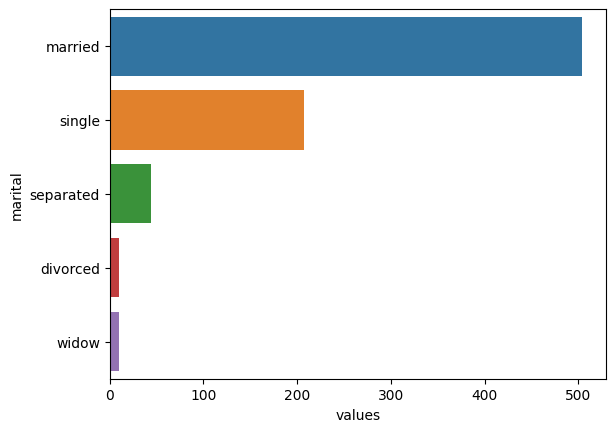

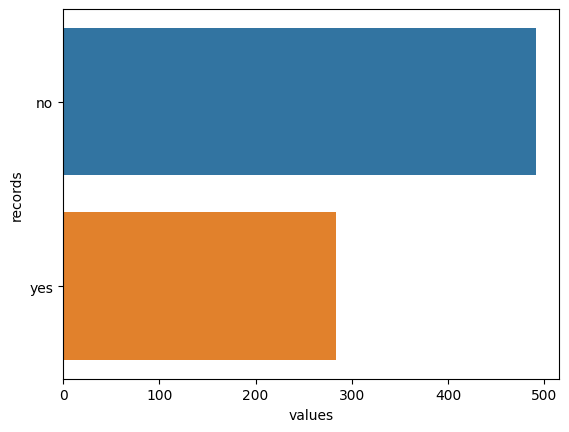

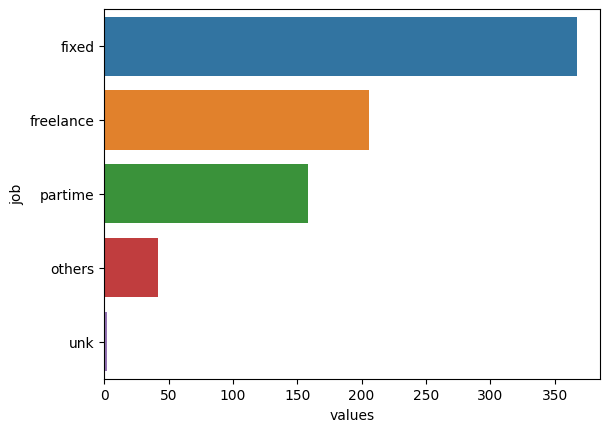

In [26]:
for i in var_categoricas:

  tab=pd.crosstab(df_train['default'],df_train[i])
  tab.reset_index(inplace=True)
  tab=pd.melt(tab,id_vars=['default'], var_name=i,value_name='values')
  tab.head()
  data_tab=tab[tab['default']==1].sort_values('values',ascending=False)

  plt.figure()
  sns.barplot(y=i,x='values',data=data_tab)
  #Tabulacion de default en funcion de las variables categoricas y luego la ordenas , finalmente, muestras graficamente cada una
  #Primero , la moyaria que estan en default son las que tienen rentas y casa propia, married
  # este analisis me da una idea mas no puedo afirmar que esas sean necesariamente las variables.

In [27]:
# Hay que analizar en terminos relativos, es mejor dado que hay que tener un mejor conocimiento del universo de los datos y como se relacionan entre si.

Cambiamos categorias por otras

In [28]:
df_train['home'].value_counts() #ignore lo llevamos a others

owner      1262
rent        581
parents     482
other       185
private     149
ignore        9
unk           4
Name: home, dtype: int64

In [29]:
# En train
df_train['home']=df_train['home'].replace('ignore','other')
df_train['home']=df_train['home'].replace('unk','other')
# En validacion
df_val['home']=df_val['home'].replace('ignore','other')
df_val['home']=df_val['home'].replace('unk','other')
# En train
df_test['home']=df_test['home'].replace('ignore','other')
df_test['home']=df_test['home'].replace('unk','other')

In [30]:
df_train['home'].value_counts()
#solo junte los datos de ignore y unk en other para asi agruparlos

owner      1262
rent        581
parents     482
other       198
private     149
Name: home, dtype: int64

In [31]:
df

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,0,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,1,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,0,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,0,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,1,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4451,0,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4452,1,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4453,0,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [32]:
df_train['marital']=df_train['marital'].replace('unk','married')
df_val['marital']=df_val['marital'].replace('unk','married')
df_test['marital']=df_test['marital'].replace('unk','married')

df_train['marital'].value_counts()


married      1947
single        585
separated      78
widow          36
divorced       26
Name: marital, dtype: int64

In [33]:
df_val['marital'].value_counts()

married      644
single       197
separated     28
widow         16
divorced       6
Name: marital, dtype: int64

In [34]:
df_train['job']=df_train['job'].replace('unk','others')
df_val['job']=df_val['job'].replace('unk','others')
df_test['job']=df_test['job'].replace('unk','others')
df_train['job'].value_counts()

fixed        1689
freelance     615
partime       258
others        110
Name: job, dtype: int64

In [35]:
df_val['job'].value_counts()

fixed        557
freelance    204
partime      103
others        27
Name: job, dtype: int64

In [36]:
df_train.sort_index()

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
2,1,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
7,0,9,parents,12,27,single,no,fixed,35,80.0,0.0,0.0,200,1093
9,1,0,parents,48,41,married,no,partime,90,80.0,0.0,0.0,1200,1468
12,0,8,owner,60,30,married,no,fixed,75,199.0,5000.0,2500.0,1500,1650
13,0,19,private,36,37,married,no,fixed,75,170.0,3500.0,260.0,600,940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,0,6,owner,48,52,married,no,fixed,45,190.0,3500.0,0.0,1500,1905
4448,0,3,owner,60,49,married,no,fixed,35,160.0,3000.0,0.0,900,975
4451,0,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4453,0,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550




*   Contribucion al riesgo ------>1(no contribuyen)
*   Mayor a 1 (aumenta riesgo)
*   Menor a 1 (reduce riesgo)








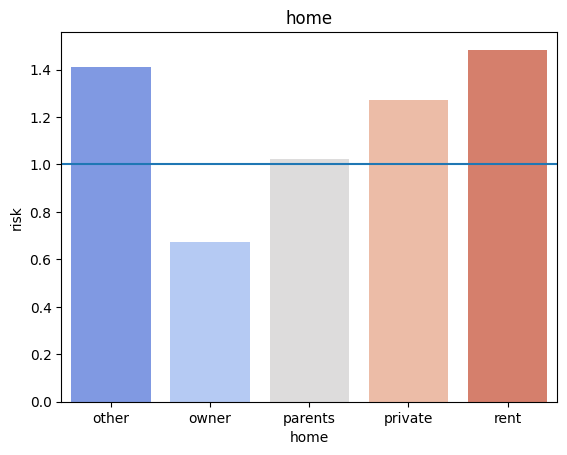

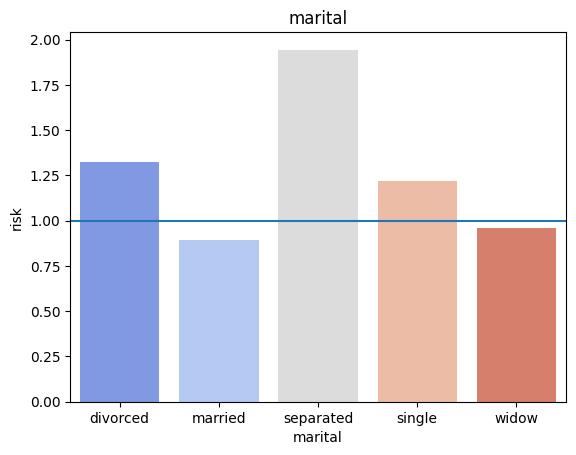

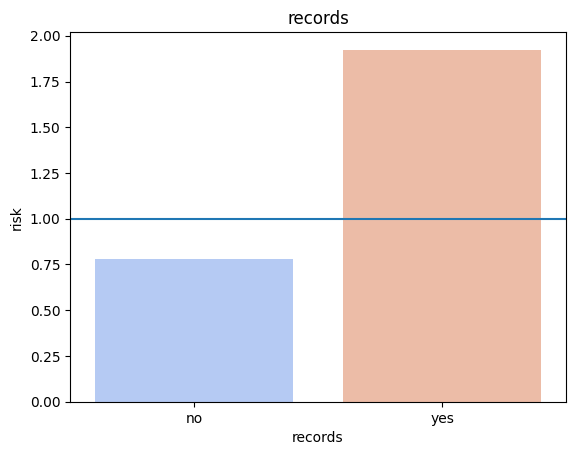

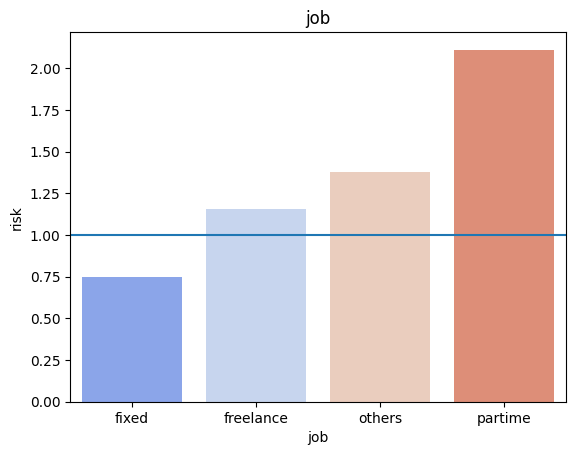

In [37]:
# iterar para obtener el promedio de cada categoria por el promedio global del default
global_mean= df_train['default'].mean()

for col in var_categoricas:
    df_risk=df_train.groupby(by=col)['default'].agg(['mean'])
    df_risk['risk']=df_risk['mean']/global_mean

    plt.figure()
    plt.title(col)
    sns.barplot(y='risk', x=df_risk.index, data=df_risk, palette='coolwarm')
    plt.axhline(y=1)

In [38]:
# Esto es la contribucion al riesgo  , por ejemplo, segun el marital  parece ser que las personas separadas muestran mayor morasidad y las
# personas casdas presentan menor tipo de riesgo.

Variables Numericas

Analisis de Correlaciones

<Axes: >

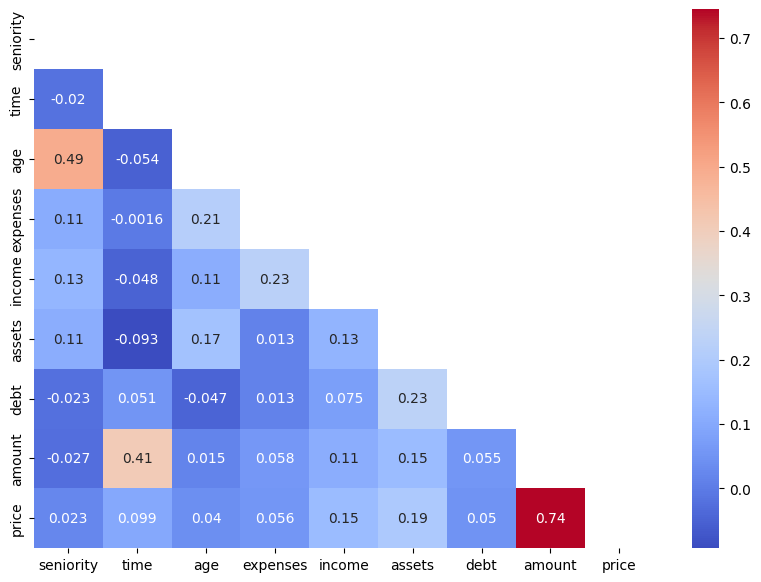

In [39]:
plt.figure(figsize=(10,7))
correlaciones=df_train[var_numericas].corr()
upp_mat=np.triu(correlaciones)
sns.heatmap(correlaciones,annot = True,cmap ='coolwarm', mask=upp_mat)


Grafico de densidades

In [40]:
  df.head()

,default,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,0,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,1,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,0,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,0,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


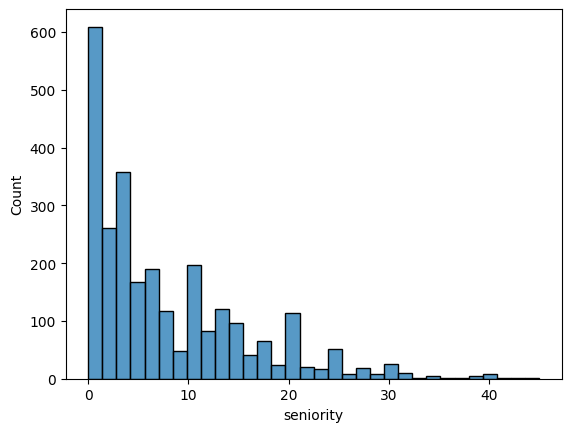

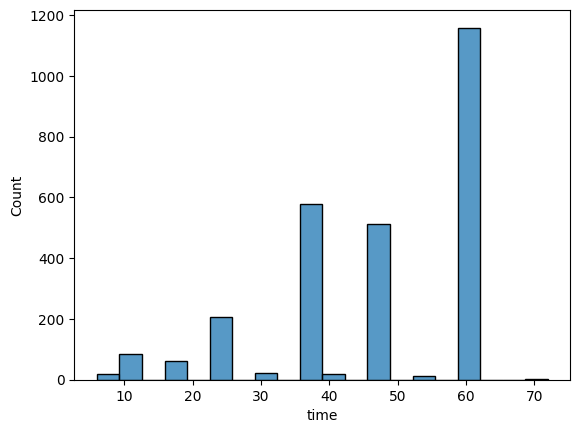

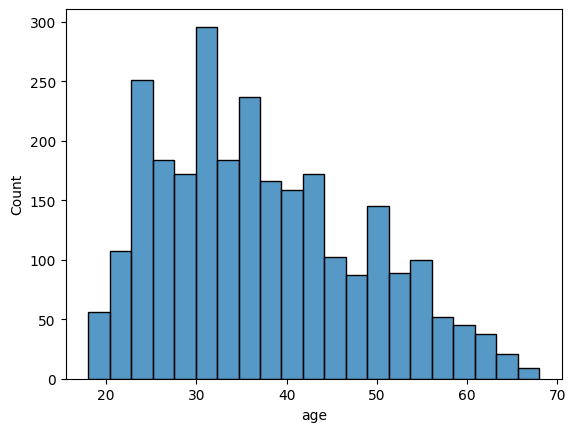

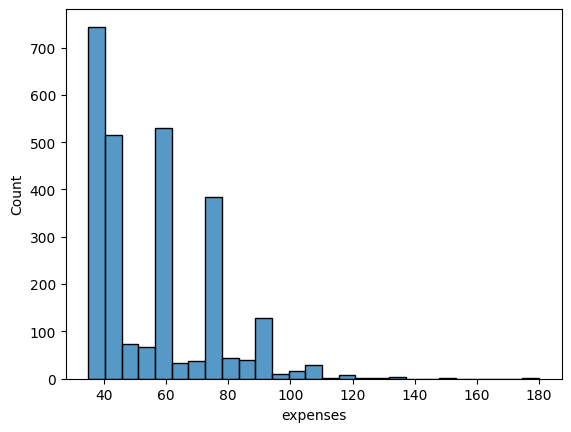

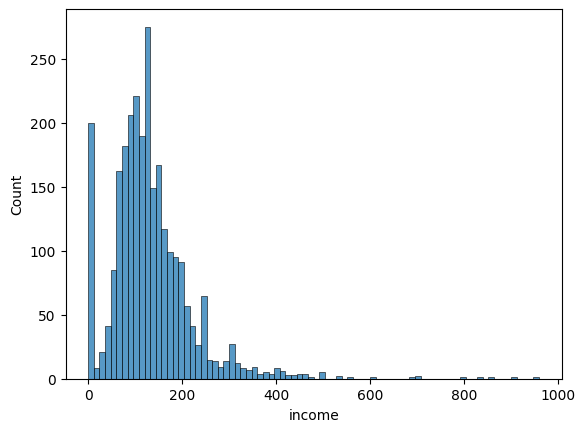

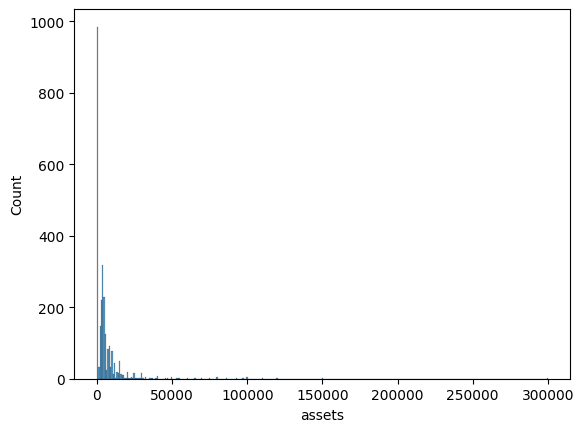

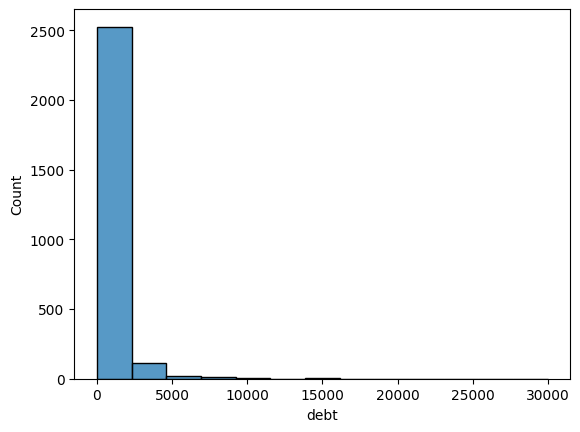

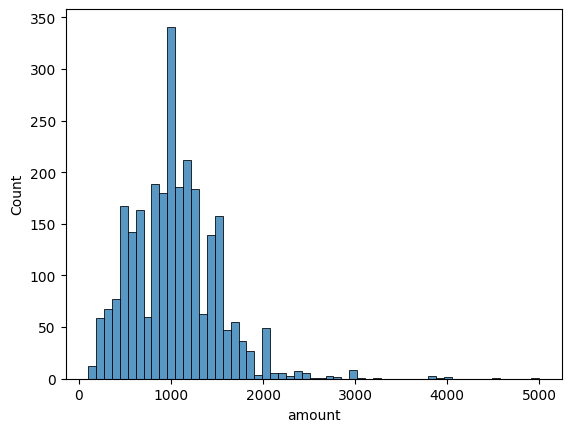

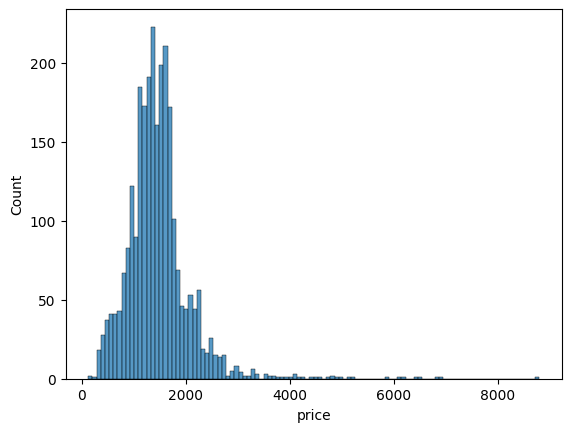

In [41]:
for i in var_numericas:
    plt.figure()
    sns.histplot(x= i, data=df_train)


<Axes: xlabel='age', ylabel='Count'>

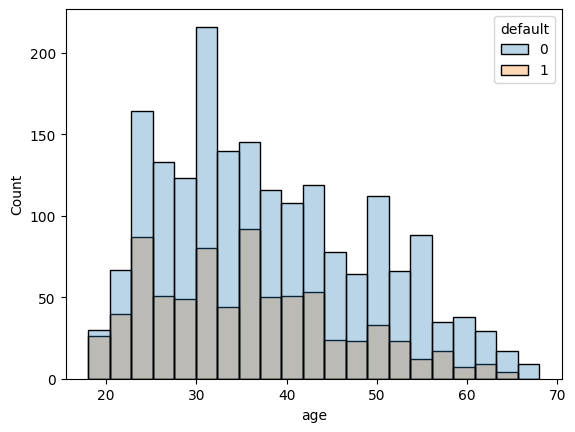

In [42]:
sns.histplot( x='age', hue ='default', data=df_train, alpha=0.3)
#como se comporta la distribucion

<ipython-input-43-79c6d21ea836>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[df_train['default']==0,'age'],label='no default')
<ipython-input-43-79c6d21ea836>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.loc[df_train['default']==1,'age'],label='default')


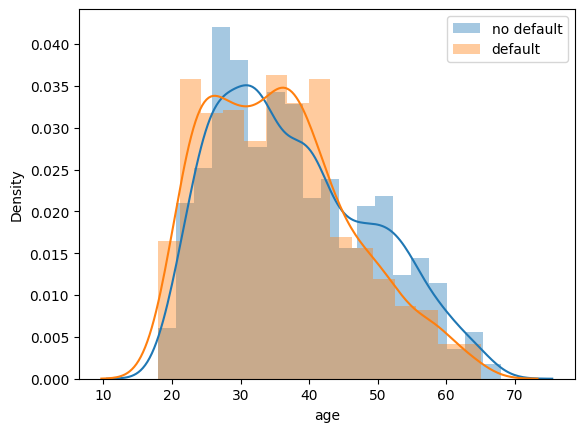

In [43]:
sns.distplot(df_train.loc[df_train['default']==0,'age'],label='no default')
sns.distplot(df_train.loc[df_train['default']==1,'age'],label='default')
plt.legend()


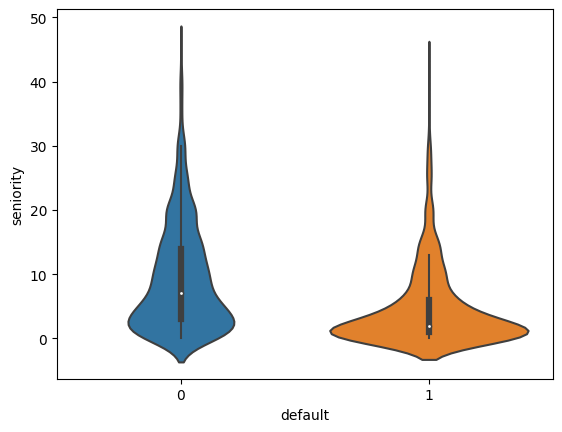

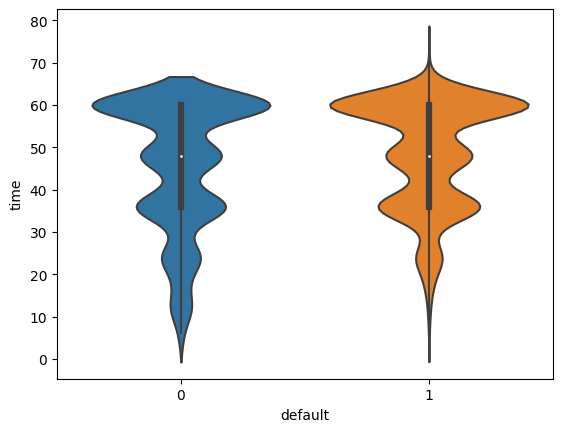

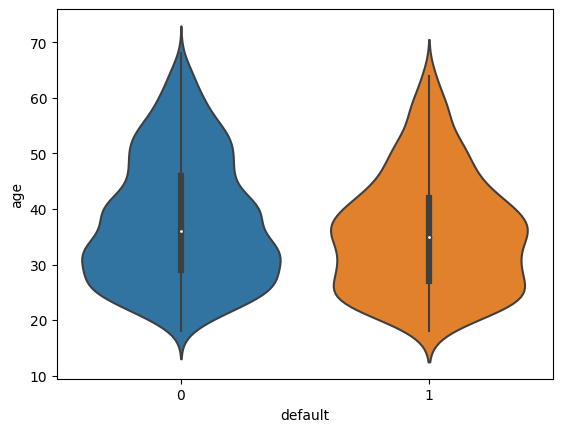

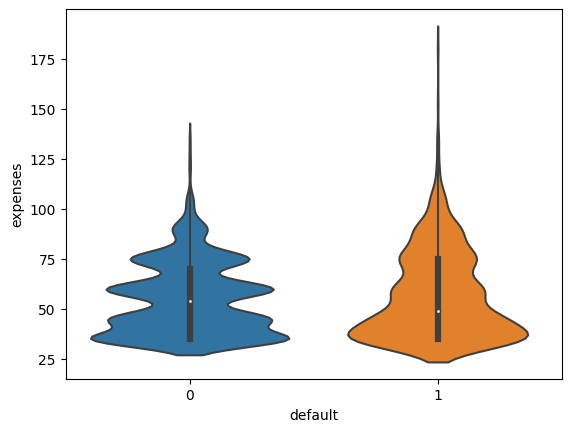

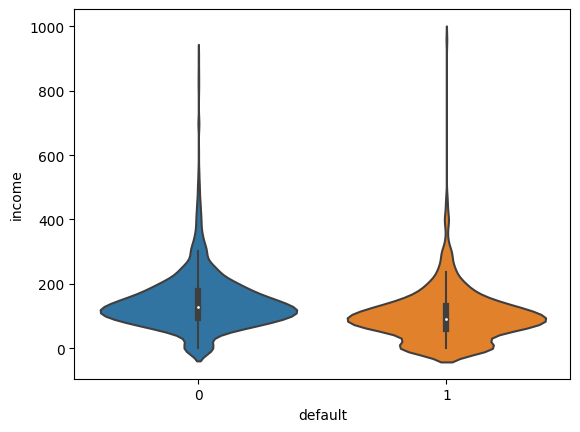

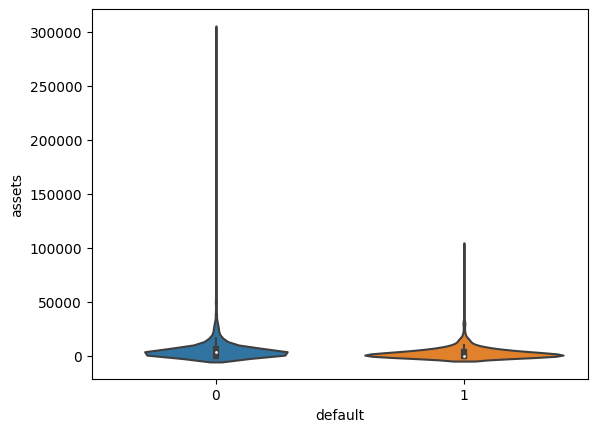

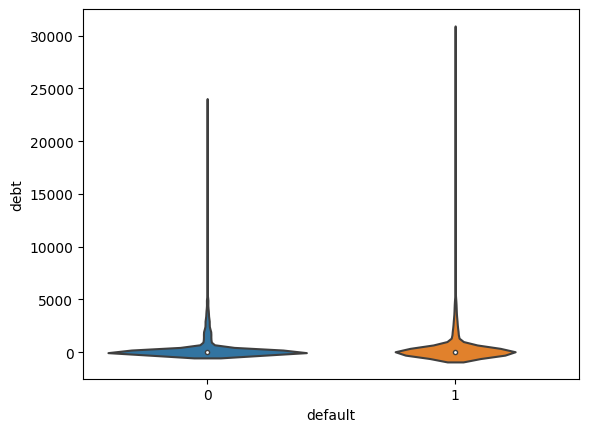

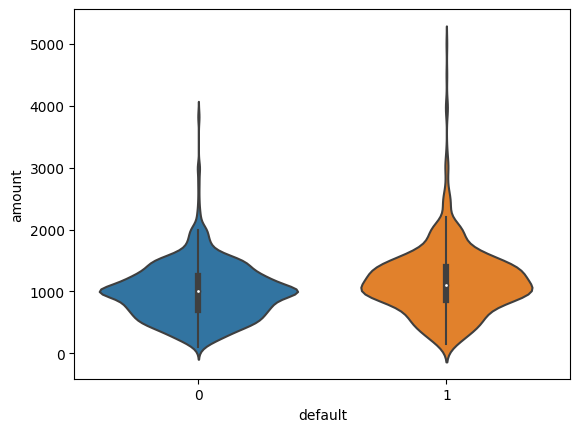

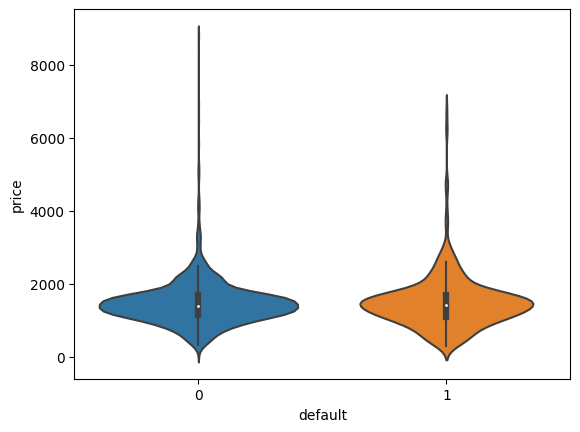

In [44]:
df_numerica=pd.concat([df_train[var_numericas],df_train['default']],axis=1)

for i in var_numericas:
    plt.figure()
    sns.violinplot(y=i, x='default',data=df_numerica)

La distribucion es mayor para personas de 2000 soles  en price.

Feacture Enginier

In [45]:
# Encontrar default de manera mas detallada

In [46]:
#one hot encoding busca categorizar en numeros las variables categoricas.

One hot encoding ------> Var categoricas nominales

In [47]:
# En train
df_cat_train=pd.get_dummies(df_train, columns= var_categoricas,drop_first=True)
df_cat_train=df_cat_train.drop(var_numericas,axis=1)
df_cat_train

,default,home_owner,home_parents,home_private,home_rent,marital_married,marital_separated,marital_single,marital_widow,records_yes,job_freelance,job_others,job_partime
3580,1,0,0,0,1,1,0,0,0,0,0,0,1
2355,0,1,0,0,0,1,0,0,0,0,0,0,0
3889,0,1,0,0,0,1,0,0,0,0,1,0,0
79,0,1,0,0,0,1,0,0,0,0,0,0,0
1172,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,0,1,0,0,0,1,0,0,0,0,0,0,0
2323,0,0,0,0,1,0,0,1,0,0,0,0,0
2173,0,0,0,0,1,0,0,1,0,0,0,0,0
665,0,0,0,0,1,1,0,0,0,0,0,0,0


In [48]:
#En val
df_cat_val=pd.get_dummies(df_val, columns= var_categoricas,drop_first=True)
df_cat_val=df_cat_val.drop(var_numericas,axis=1)
#En test
df_cat_test=pd.get_dummies(df_test, columns= var_categoricas,drop_first=True)
df_cat_test=df_cat_test.drop(var_numericas,axis=1)
df_cat_test.head()

,default,home_owner,home_parents,home_private,home_rent,marital_married,marital_separated,marital_single,marital_widow,records_yes,job_freelance,job_others,job_partime
408,0,0,1,0,0,1,0,0,0,0,0,0,0
459,0,1,0,0,0,1,0,0,0,0,0,0,0
4304,0,0,0,0,1,1,0,0,0,0,0,0,0
42,0,1,0,0,0,0,0,0,1,0,0,1,0
532,0,0,0,0,1,1,0,0,0,0,0,0,0


Tratamientos de los outliers

In [49]:
df_numerica_train=df_train[var_numericas]
df_numerica_val=df_val[var_numericas]
df_numerica_test=df_test[var_numericas]
df_numerica_val.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,8.094276,46.006734,36.992144,56.032548,127.446689,5558.445567,242.116723,1035.841751,1462.249158
std,8.490052,14.778817,10.799238,20.043269,82.364933,13702.585136,847.676829,483.912738,579.250848
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,175.000000
25%,1.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1105.000000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1419.000000
75%,13.000000,60.000000,45.000000,72.500000,161.000000,6000.000000,0.000000,1300.000000,1700.000000
max,48.000000,60.000000,65.000000,173.000000,715.000000,250000.000000,9700.000000,4000.000000,4786.000000


In [50]:
# Revisar valores atipicos, comparamos la media con la mediana , si fieren mucho hay problemas atipicos.
# Lo que Hace mi tratamiento logaritmico achica mis valores grandes y agranda mis valores tipicos.

Tratamiento logaritmicos

In [51]:
# En train
# Hay valores de 0 pero en algunos datos por lo que se debe aumentar +1 para que no ocurra un problema en el machine learning.
df_numerica_train['ln_Seniority']= np.log(df_train['seniority']+1) #logaritmo natural, np.log10()---> logaritmo en base 10
df_numerica_train['ln_age']= np.log(df_train['age'])
df_numerica_train['ln_price']= np.log(df_train['price']+1)
df_numerica_train['ln_expenses']= np.log(df_train['expenses'])
df_numerica_train['ln_income']= np.log(df_train['income']+1)
df_numerica_train['ln_assets']= np.log(df_train['assets']+1)
df_numerica_train['ln_debt']= np.log(df_train['debt']+1)
df_numerica_train['ln_amount']= np.log(df_train['amount'])
df_numerica_train.describe()

<ipython-input-51-14a60b9881fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerica_train['ln_Seniority']= np.log(df_train['seniority']+1) #logaritmo natural, np.log10()---> logaritmo en base 10
<ipython-input-51-14a60b9881fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerica_train['ln_age']= np.log(df_train['age'])
<ipython-input-51-14a60b9881fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,seniority,time,age,expenses,income,assets,debt,amount,price,ln_Seniority,ln_age,ln_price,ln_expenses,ln_income,ln_assets,ln_debt,ln_amount
count,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,7.952096,46.477545,37.208458,55.506362,131.625000,5416.377994,371.119760,1045.740269,1473.734281,1.752477,3.572700,7.214504,3.960294,4.471206,5.488065,1.238747,6.839153
std,8.009164,14.607695,11.050595,19.254642,88.994551,11655.405911,1379.679538,480.707445,639.386455,1.003226,0.297099,0.413231,0.331584,1.362302,4.209042,2.739505,0.506311
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,125.000000,0.000000,2.890372,4.836282,3.555348,0.000000,0.000000,0.000000,4.605170
25%,2.000000,36.000000,28.000000,35.000000,81.000000,0.000000,0.000000,700.000000,1131.000000,1.098612,3.332205,7.031741,3.555348,4.406719,0.000000,0.000000,6.551080
50%,5.000000,48.000000,36.000000,52.000000,120.000000,3000.000000,0.000000,1000.000000,1406.000000,1.791759,3.583519,7.249215,3.951244,4.795791,8.006701,0.000000,6.907755
75%,12.000000,60.000000,45.000000,73.000000,165.000000,6000.000000,0.000000,1300.000000,1693.000000,2.564949,3.806662,7.434848,4.290459,5.111988,8.699681,0.000000,7.170120
max,45.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,8800.000000,3.828641,4.219508,9.082621,5.192957,6.866933,12.611541,10.308986,8.517193


In [52]:
# En Val
# Hay valores de 0 pero en algunos datos por lo que se debe aumentar +1 para que no ocurra un problema en el machine learning.
df_numerica_val['ln_Seniority']= np.log(df_val['seniority']+1) #logaritmo natural, np.log10()---> logaritmo en base 10
df_numerica_val['ln_age']= np.log(df_val['age'])
df_numerica_val['ln_price']= np.log(df_val['price']+1)
df_numerica_val['ln_expenses']= np.log(df_val['expenses'])
df_numerica_val['ln_income']= np.log(df_val['income']+1)
df_numerica_val['ln_assets']= np.log(df_val['assets']+1)
df_numerica_val['ln_debt']= np.log(df_val['debt']+1)
df_numerica_val['ln_amount']= np.log(df_val['amount'])
df_numerica_val.describe()

<ipython-input-52-8c221427873d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerica_val['ln_Seniority']= np.log(df_val['seniority']+1) #logaritmo natural, np.log10()---> logaritmo en base 10
<ipython-input-52-8c221427873d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerica_val['ln_age']= np.log(df_val['age'])
<ipython-input-52-8c221427873d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,seniority,time,age,expenses,income,assets,debt,amount,price,ln_Seniority,ln_age,ln_price,ln_expenses,ln_income,ln_assets,ln_debt,ln_amount
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,8.094276,46.006734,36.992144,56.032548,127.446689,5558.445567,242.116723,1035.841751,1462.249158,1.727681,3.567369,7.207269,3.968117,4.401201,5.439777,1.019005,6.821505
std,8.490052,14.778817,10.799238,20.043269,82.364933,13702.585136,847.676829,483.912738,579.250848,1.044296,0.297089,0.424246,0.334692,1.450110,4.231876,2.490704,0.525830
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,175.000000,0.000000,2.890372,5.170484,3.555348,0.000000,0.000000,0.000000,4.605170
25%,1.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1105.000000,0.693147,3.332205,7.008505,3.555348,4.394449,0.000000,0.000000,6.551080
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1419.000000,1.791759,3.583519,7.258412,3.931826,4.795791,8.006701,0.000000,6.907755
75%,13.000000,60.000000,45.000000,72.500000,161.000000,6000.000000,0.000000,1300.000000,1700.000000,2.639057,3.806662,7.438972,4.283563,5.087596,8.699681,0.000000,7.170120
max,48.000000,60.000000,65.000000,173.000000,715.000000,250000.000000,9700.000000,4000.000000,4786.000000,3.891820,4.174387,8.473659,5.153292,6.573680,12.429220,9.179984,8.294050


In [53]:
# En test
# Hay valores de 0 pero en algunos datos por lo que se debe aumentar +1 para que no ocurra un problema en el machine learning.
df_numerica_test['ln_Seniority']= np.log(df_test['seniority']+1) #logaritmo natural, np.log10()---> logaritmo en base 10
df_numerica_test['ln_age']= np.log(df_test['age'])
df_numerica_test['ln_price']= np.log(df_test['price']+1)
df_numerica_test['ln_expenses']= np.log(df_test['expenses'])
df_numerica_test['ln_income']= np.log(df_test['income']+1)
df_numerica_test['ln_assets']= np.log(df_test['assets']+1)
df_numerica_test['ln_debt']= np.log(df_test['debt']+1)
df_numerica_test['ln_amount']= np.log(df_test['amount'])
df_numerica_test.describe()

<ipython-input-53-50653785a3f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerica_test['ln_Seniority']= np.log(df_test['seniority']+1) #logaritmo natural, np.log10()---> logaritmo en base 10
<ipython-input-53-50653785a3f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerica_test['ln_age']= np.log(df_test['age'])
<ipython-input-53-50653785a3f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,seniority,time,age,expenses,income,assets,debt,amount,price,ln_Seniority,ln_age,ln_price,ln_expenses,ln_income,ln_assets,ln_debt,ln_amount
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,7.983165,46.754209,36.784512,55.315376,130.097643,5085.521886,352.755331,1021.536476,1430.461279,1.743698,3.561262,7.182781,3.955148,4.465933,5.543855,1.332524,6.819854
std,8.349443,14.681226,10.975490,19.771685,80.516175,8242.151066,1137.887792,445.653251,640.478246,1.006954,0.296243,0.426003,0.334526,1.368620,4.202971,2.812056,0.501509
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000,0.000000,2.890372,4.663439,3.555348,0.000000,0.000000,0.000000,4.605170
25%,2.000000,36.000000,28.000000,35.000000,80.500000,0.000000,0.000000,700.000000,1098.000000,1.098612,3.332205,7.002156,3.555348,4.400584,0.000000,0.000000,6.551080
50%,5.000000,48.000000,35.000000,46.000000,120.000000,3500.000000,0.000000,1000.000000,1374.000000,1.791759,3.555348,7.226209,3.828641,4.795791,8.160804,0.000000,6.907755
75%,12.000000,60.000000,45.000000,68.000000,165.000000,6000.000000,0.000000,1300.000000,1664.000000,2.564949,3.806662,7.417580,4.219508,5.111988,8.699681,0.000000,7.170120
max,47.000000,60.000000,66.000000,165.000000,532.000000,90000.000000,21400.000000,4000.000000,11140.000000,3.871201,4.189655,9.318387,5.105945,6.278521,11.407576,9.971193,8.294050


Tratamiento con percentiles

- Con este tratamiento corto la distribucion con los limites.
- Ambos tratamientos hacen que la distribucion sea mas o menos como una normal.

In [54]:
q_income_05=df_train['income'].quantile(0.05)
q_income_95=df_train['income'].quantile(0.95)
print(q_income_95)

289.0


In [55]:
def limite_0595(x,data):
  q_05=data.loc[:,x].quantile(0.05)
  q_95=data.loc[:,x].quantile(0.95)

  data.loc[df[x]<q_05,x]=q_05
  data.loc[df[x]>q_95,x]=q_95
  return data


In [56]:
for i in var_numericas:
  df_numerica_train=limite_0595(i, data=df_numerica_train)
  df_numerica_val=limite_0595(i, data=df_numerica_val)
  df_numerica_test=limite_0595(i, data=df_numerica_test)

In [57]:
df_numerica_val.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price,ln_Seniority,ln_age,ln_price,ln_expenses,ln_income,ln_assets,ln_debt,ln_amount
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,7.772166,46.323232,36.909091,55.299663,122.242424,4294.696970,162.367003,1022.236813,1439.467452,1.727681,3.567369,7.207269,3.968117,4.401201,5.439777,1.019005,6.821505
std,7.614943,14.074717,10.351987,17.906655,66.238534,5028.434381,453.969633,423.490131,474.626516,1.044296,0.297089,0.424246,0.334692,1.450110,4.231876,2.490704,0.525830
min,0.000000,18.000000,22.000000,35.000000,0.000000,0.000000,0.000000,350.000000,572.500000,0.000000,2.890372,5.170484,3.555348,0.000000,0.000000,0.000000,4.605170
25%,1.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1105.000000,0.693147,3.332205,7.008505,3.555348,4.394449,0.000000,0.000000,6.551080
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1419.000000,1.791759,3.583519,7.258412,3.931826,4.795791,8.006701,0.000000,6.907755
75%,13.000000,60.000000,45.000000,72.500000,161.000000,6000.000000,0.000000,1300.000000,1700.000000,2.639057,3.806662,7.438972,4.283563,5.087596,8.699681,0.000000,7.170120
max,25.000000,60.000000,56.000000,90.000000,257.000000,18000.000000,1725.000000,1900.000000,2423.000000,3.891820,4.174387,8.473659,5.153292,6.573680,12.429220,9.179984,8.294050


In [58]:
# Para analizar las distancias , pero esas distancias debe ser segun el tipo de caracterizacion.
# Aca estamos normalizando la data , para que la media sea igual a cero , por lo que , debemos hallar la desviacion estandar(Z)
# Para eso debemos el calculo es Z= (X- media)/desviacion estandar

Escalar Var Numericas

In [59]:
from sklearn.preprocessing import StandardScaler
scale_z=StandardScaler()
df_z_train=scale_z.fit_transform(df_numerica_train[var_numericas])
df_z_train=pd.DataFrame(df_z_train, columns=var_numericas)

df_z_val=scale_z.fit_transform(df_numerica_val[var_numericas])
df_z_val=pd.DataFrame(df_z_val, columns=var_numericas)

df_z_test=scale_z.fit_transform(df_numerica_test[var_numericas])
df_z_test=pd.DataFrame(df_z_test, columns=var_numericas)
df_z_val.head()

,seniority,time,age,expenses,income,assets,debt,amount,price
0,-0.232853,0.972272,-1.344370,-0.407880,0.177603,-0.854562,-0.357861,-0.052538,-0.791524
1,-0.758431,0.119200,-0.474484,0.262638,0.676082,-0.456601,-0.357861,1.010657,0.545013
2,1.606670,-2.013479,1.845214,0.262638,-1.846525,-0.257620,-0.357861,-1.233866,-0.078985
3,1.606670,-1.586943,1.361944,1.100786,0.117182,1.135245,-0.357861,-1.233866,-0.424714
4,-1.021220,-0.733871,-1.247716,-0.575509,-1.846525,2.727091,-0.357861,-0.761335,-0.475309


In [60]:
df_z_val.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,1.993666e-17,-2.053476e-16,2.512020e-16,-3.189866e-17,-1.096517e-16,-6.579099e-17,1.694617e-17,-1.156327e-16,-1.016770e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.021220e+00,-2.013479e+00,-1.441024e+00,-1.134275e+00,-1.846525e+00,-8.545620e-01,-3.578614e-01,-1.588265e+00,-1.827657e+00
25%,-8.898254e-01,-7.338713e-01,-8.610999e-01,-1.134275e+00,-6.380900e-01,-8.545620e-01,-3.578614e-01,-7.613348e-01,-7.050919e-01
50%,-3.642474e-01,1.192002e-01,-8.786733e-02,-2.402502e-01,-3.387279e-02,-2.576198e-01,-3.578614e-01,-5.253795e-02,-4.314750e-02
75%,6.869086e-01,9.722717e-01,7.820193e-01,9.610950e-01,5.854499e-01,3.393225e-01,-3.578614e-01,6.562590e-01,5.492295e-01
max,2.263643e+00,9.722717e-01,1.845214e+00,1.938934e+00,2.035571e+00,2.727091e+00,3.444086e+00,2.073853e+00,2.073388e+00


In [61]:
#cambiando el nombre de las columnas
diccionario_variables_z = {'seniority':'seniority_z',
                     'time':'time_z',
                     'age':'age_z',
                     'expenses':'expenses_z',
                     'income':'income_z',
                     'assets':'assets_z',
                     'debt':'debt_z',
                     'amount':'amount_z',
                     'price':'price_z'}

df_z_train.rename(columns= diccionario_variables_z ,inplace=True)
df_z_val.rename(columns= diccionario_variables_z ,inplace=True)
df_z_test.rename(columns= diccionario_variables_z ,inplace=True)
df_z_val.head()
# Con esto reemplazamos en los dataframe 

,seniority_z,time_z,age_z,expenses_z,income_z,assets_z,debt_z,amount_z,price_z
0,-0.232853,0.972272,-1.344370,-0.407880,0.177603,-0.854562,-0.357861,-0.052538,-0.791524
1,-0.758431,0.119200,-0.474484,0.262638,0.676082,-0.456601,-0.357861,1.010657,0.545013
2,1.606670,-2.013479,1.845214,0.262638,-1.846525,-0.257620,-0.357861,-1.233866,-0.078985
3,1.606670,-1.586943,1.361944,1.100786,0.117182,1.135245,-0.357861,-1.233866,-0.424714
4,-1.021220,-0.733871,-1.247716,-0.575509,-1.846525,2.727091,-0.357861,-0.761335,-0.475309


Uniendo la data scalar con limites y logaritmos

In [62]:
df_num_train = pd.concat([df_numerica_train.reset_index(drop=True), df_z_train], axis = 1)
df_num_val = pd.concat([df_numerica_val.reset_index(drop=True), df_z_val], axis = 1)
df_num_test = pd.concat([df_numerica_test.reset_index(drop=True), df_z_test], axis = 1)
df_num_test.tail()

,seniority,time,age,expenses,income,assets,debt,amount,price,ln_Seniority,...,ln_amount,seniority_z,time_z,age_z,expenses_z,income_z,assets_z,debt_z,amount_z,price_z
886,25,60,56.5,60,150.0,3200.0,400.0,800.0,1314,3.433987,...,6.684612,2.370038,0.924838,1.900475,0.300786,0.339089,-0.241149,0.174446,-0.531027,-0.196444
887,10,36,30.0,60,123.0,8000.0,2100.0,800.0,2200,2.397895,...,6.684612,0.322755,-0.788323,-0.633295,0.300786,-0.049158,0.732737,2.636481,-0.531027,1.755377
888,3,60,32.0,45,90.0,6000.0,0.0,1500.0,2331,1.386294,...,7.313220,-0.632643,0.924838,-0.442067,-0.537589,-0.523682,0.326951,-0.404857,1.230875,2.043964
889,1,36,25.0,54,87.0,0.0,0.0,500.0,646,0.693147,...,6.214608,-0.905614,-0.788323,-1.111365,-0.034564,-0.566821,-0.890406,-0.404857,-1.286128,-1.668020
890,1,60,24.0,35,127.0,3500.0,2000.0,1700.0,1825,0.693147,...,7.438384,-0.905614,0.924838,-1.206979,-1.096506,0.008360,-0.180281,2.491656,1.734276,0.929267


In [63]:
df_num_train.columns

Index(['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt',
       'amount', 'price', 'ln_Seniority', 'ln_age', 'ln_price', 'ln_expenses',
       'ln_income', 'ln_assets', 'ln_debt', 'ln_amount', 'seniority_z',
       'time_z', 'age_z', 'expenses_z', 'income_z', 'assets_z', 'debt_z',
       'amount_z', 'price_z'],
      dtype='object')

## Monotonic-WOE-Binning-Algorithm
Categorizar var numericas

In [64]:
# Lo que hace esto es hacer un algoritmo para detectar si son buenos o malos clientes, por lo que para eso lo separamos en categorias mas no por su valor absoluto.
# Establecer cuantas categorias se realizaran, y cuanto es la dimension del intervalo.
# Encontrar la division optima , atraves de un algoritmo llamado arbol de decision.

Agrupamos todos los feautures

In [65]:
df_train_transformed = pd.concat([df_cat_train.reset_index(drop=True), df_num_train ],axis = 1)
df_val_transformed = pd.concat([df_cat_val.reset_index(drop=True), df_num_val ],axis = 1)
df_test_transformed = pd.concat([df_cat_test.reset_index(drop=True), df_num_test ],axis = 1)
#df_final = df_final.dropna()
df_train_transformed

,default,home_owner,home_parents,home_private,home_rent,marital_married,marital_separated,marital_single,marital_widow,records_yes,...,ln_amount,seniority_z,time_z,age_z,expenses_z,income_z,assets_z,debt_z,amount_z,price_z
0,1,0,0,0,1,1,0,0,0,0,...,7.003065,-0.918022,-0.769905,-0.010881,1.125241,0.260354,-0.856870,-0.383859,0.184180,0.920086
1,0,1,0,0,0,1,0,0,0,0,...,6.802395,1.680447,0.948713,0.366716,1.125241,0.840147,0.739145,-0.309730,-0.316170,0.554104
2,0,1,0,0,0,1,0,0,0,0,...,7.204149,-1.054784,0.948713,0.933112,-0.559499,-0.998220,0.340142,-0.383859,0.797110,-0.205683
3,0,1,0,0,0,1,0,0,0,0,...,6.802395,2.364255,0.089404,1.782705,-0.559499,-0.376004,-0.258364,-0.383859,-0.316170,-0.173580
4,0,0,0,0,1,1,0,0,0,0,...,5.298317,-0.507738,-2.058868,-0.860475,0.619819,-0.941655,-0.856870,-0.383859,-1.692135,0.267311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0,1,0,0,0,1,0,0,0,0,...,7.313220,0.996640,-0.769905,0.933112,1.125241,2.296699,-0.158613,-0.383859,1.184882,1.525775
2668,0,0,0,0,1,0,0,1,0,0,...,6.907755,0.312832,0.089404,-1.049274,-0.166393,0.599745,-0.457866,-0.383859,-0.065995,-0.426128
2669,0,0,0,0,1,0,0,1,0,0,...,7.649693,-0.507738,0.948713,-1.426871,-0.447183,-0.093178,0.739145,-0.383859,1.935409,1.410202
2670,0,0,0,0,1,1,0,0,0,0,...,7.090077,-0.234214,0.948713,-1.049274,0.282871,0.331061,-0.856870,-0.383859,0.434356,-0.139336


In [66]:
df_val_transformed

,default,home_owner,home_parents,home_private,home_rent,marital_married,marital_separated,marital_single,marital_widow,records_yes,...,ln_amount,seniority_z,time_z,age_z,expenses_z,income_z,assets_z,debt_z,amount_z,price_z
0,0,0,0,0,1,1,0,0,0,0,...,6.907755,-0.232853,0.972272,-1.344370,-0.407880,0.177603,-0.854562,-0.357861,-0.052538,-0.791524
1,0,0,1,0,0,1,0,0,0,0,...,7.279319,-0.758431,0.119200,-0.474484,0.262638,0.676082,-0.456601,-0.357861,1.010657,0.545013
2,0,1,0,0,0,1,0,0,0,0,...,6.214608,1.606670,-2.013479,1.845214,0.262638,-1.846525,-0.257620,-0.357861,-1.233866,-0.078985
3,0,1,0,0,0,1,0,0,0,0,...,6.214608,1.606670,-1.586943,1.361944,1.100786,0.117182,1.135245,-0.357861,-1.233866,-0.424714
4,0,0,1,0,0,0,0,1,0,0,...,6.551080,-1.021220,-0.733871,-1.247716,-0.575509,-1.846525,2.727091,-0.357861,-0.761335,-0.475309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,1,0,0,0,0,...,6.551080,0.424120,0.119200,0.492057,1.100786,0.872453,-0.158129,2.286972,-0.761335,0.555554
887,0,1,0,0,0,1,0,0,0,0,...,7.313220,-0.889825,0.972272,0.975327,1.100786,-0.668301,-0.058639,-0.357861,1.128790,0.572419
888,0,1,0,0,0,1,0,0,0,0,...,7.090077,-0.627036,0.972272,-0.087867,0.262638,0.253130,0.339322,-0.357861,0.419993,-0.203363
889,0,1,0,0,0,1,0,0,0,0,...,6.684612,0.818303,-1.586943,1.748560,1.938934,2.035571,0.140342,-0.357861,-0.525069,-0.243417


In [67]:
pip install monotonic-binning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from monotonic_binning.monotonic_woe_binning import Binning

In [69]:
var = "age" # variable to be binned
y_var = "default" # the target variable

bin_object_age = Binning(y_var, n_threshold = 10, y_threshold = 10, p_threshold = 0.3, sign=True)
bin_object_age.fit(df_train_transformed[[y_var, var]])

print(bin_object_age.woe_summary)
print(f"The bin cut-points in an array is: , {bin_object_age.bins}")


   age  nsamples     means   bads   goods  dist_good  dist_bad   WOE_age  IV_components  age_shift     labels
0   22     226.0  0.402655   91.0   135.0   0.071165  0.117419 -0.500751       0.023162       24.0  22.0-24.0
1   24      99.0  0.363636   36.0    63.0   0.033210  0.046452 -0.335550       0.004443       25.0  24.0-25.0
2   25    1659.0  0.298975  496.0  1163.0   0.613073  0.640000 -0.042984       0.001157       45.0  25.0-45.0
3   45     291.0  0.264605   77.0   214.0   0.112810  0.099355  0.127005       0.001709       51.0  45.0-51.0
4   51     397.0  0.188917   75.0   322.0   0.169742  0.096774  0.561897       0.041000        inf   51.0-inf
The bin cut-points in an array is: , [-inf  22.  24.  25.  45.  51.  inf]


In [70]:
var_numericas

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price']

In [71]:
#Seniority
bin_object_s = Binning(y_var, n_threshold = 10, y_threshold = 10, p_threshold = 0.3, sign=True)
bin_object_s.fit(df_train_transformed[[y_var, "seniority"]])

#Time
bin_object_t = Binning(y_var, n_threshold = 10, y_threshold = 10, p_threshold = 0.3, sign=True)
bin_object_t.fit(df_train_transformed[[y_var, "time"]])

#expenses
bin_object_e = Binning(y_var, n_threshold = 10, y_threshold = 10, p_threshold = 0.3, sign=True)
bin_object_e.fit(df_train_transformed[[y_var, "expenses"]])

#income
bin_object_i = Binning(y_var, n_threshold = 10, y_threshold = 10, p_threshold = 0.3, sign=True)
bin_object_i.fit(df_train_transformed[[y_var, "income"]])

#assets
bin_object_as = Binning(y_var, n_threshold = 10, y_threshold = 10, p_threshold = 0.3, sign=True)
bin_object_as.fit(df_train_transformed[[y_var, "assets"]])

#debt
bin_object_d = Binning(y_var, n_threshold = 10, y_threshold = 10, p_threshold = 0.3, sign=True)
bin_object_d.fit(df_train_transformed[[y_var, "debt"]])

#amount
bin_object_am = Binning(y_var, n_threshold = 10, y_threshold = 10, p_threshold = 0.3, sign=True)
bin_object_am.fit(df_train_transformed[[y_var, "amount"]])

#price
bin_object_p = Binning(y_var, n_threshold = 10, y_threshold = 10, p_threshold = 0.3, sign=True)
bin_object_p.fit(df_train_transformed[[y_var, "price"]])

In [72]:
#En Train
df_train_transformed = bin_object_age.transform(df_train_transformed)
df_train_transformed = bin_object_s.transform(df_train_transformed)
df_train_transformed = bin_object_t.transform(df_train_transformed)
df_train_transformed = bin_object_e.transform(df_train_transformed)
df_train_transformed = bin_object_i.transform(df_train_transformed)
df_train_transformed = bin_object_as.transform(df_train_transformed)
df_train_transformed = bin_object_d.transform(df_train_transformed)
df_train_transformed = bin_object_am.transform(df_train_transformed)
df_train_transformed = bin_object_p.transform(df_train_transformed)

In [73]:
df_train_transformed.head(5)

,default,home_owner,home_parents,home_private,home_rent,marital_married,marital_separated,marital_single,marital_widow,records_yes,job_freelance,job_others,job_partime,seniority,time,age,expenses,income,assets,debt,amount,price,ln_Seniority,ln_age,ln_price,ln_expenses,ln_income,ln_assets,ln_debt,ln_amount,seniority_z,time_z,age_z,expenses_z,income_z,assets_z,debt_z,amount_z,price_z,age_bins,seniority_bins,time_bins,expenses_bins,income_bins,assets_bins,debt_bins,amount_bins,price_bins
0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,36,37,75,145.0,0.0,0.0,1100,1871.0,0.693147,3.610918,7.534763,4.317488,4.983607,0.000000,0.000000,7.003065,-0.918022,-0.769905,-0.010881,1.125241,0.260354,-0.856870,-0.383859,0.184180,0.920086,"[25.0, 45.0)","[1.0, 2.0)","[18.0, inf)","[45.0, inf)","[128.0, 151.0)","[0.0, 1800.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)"
1,0,1,0,0,0,1,0,0,0,0,0,0,0,20,60,41,75,186.0,8000.0,50.0,900,1700.0,3.044522,3.713572,7.438972,4.317488,5.231109,8.987322,3.931826,6.802395,1.680447,0.948713,0.366716,1.125241,0.840147,0.739145,-0.309730,-0.316170,0.554104,"[25.0, 45.0)","[16.0, inf)","[18.0, inf)","[45.0, inf)","[151.0, inf)","[3700.0, 16200.0)","[42.0, inf)","[350.0, inf)","[820.0, inf)"
2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,60,47,45,56.0,6000.0,0.0,1345,1345.0,0.000000,3.850148,7.204893,3.806662,4.043051,8.699681,0.000000,7.204149,-1.054784,0.948713,0.933112,-0.559499,-0.998220,0.340142,-0.383859,0.797110,-0.205683,"[45.0, 51.0)","[0.0, 1.0)","[18.0, inf)","[45.0, inf)","[41.0, 73.0)","[3700.0, 16200.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)"
3,0,1,0,0,0,1,0,0,0,0,0,0,0,25,48,56,45,100.0,3000.0,0.0,900,1360.0,3.401197,4.025352,7.215975,3.806662,4.615121,8.006701,0.000000,6.802395,2.364255,0.089404,1.782705,-0.559499,-0.376004,-0.258364,-0.383859,-0.316170,-0.173580,"[51.0, inf)","[16.0, inf)","[18.0, inf)","[45.0, inf)","[89.0, 106.0)","[2900.0, 3700.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)"
4,0,0,0,0,1,1,0,0,0,0,0,0,0,4,18,28,66,60.0,0.0,0.0,350,1566.0,1.609438,3.332205,7.356918,4.189655,4.110874,0.000000,0.000000,5.298317,-0.507738,-2.058868,-0.860475,0.619819,-0.941655,-0.856870,-0.383859,-1.692135,0.267311,"[25.0, 45.0)","[3.0, 5.0)","[18.0, inf)","[45.0, inf)","[41.0, 73.0)","[0.0, 1800.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)"


In [74]:
#En val
df_val_transformed = bin_object_age.transform(df_val_transformed)
df_val_transformed = bin_object_s.transform(df_val_transformed)
df_val_transformed = bin_object_t.transform(df_val_transformed)
df_val_transformed = bin_object_e.transform(df_val_transformed)
df_val_transformed = bin_object_i.transform(df_val_transformed)
df_val_transformed = bin_object_as.transform(df_val_transformed)
df_val_transformed = bin_object_d.transform(df_val_transformed)
df_val_transformed = bin_object_am.transform(df_val_transformed)
df_val_transformed = bin_object_p.transform(df_val_transformed)

In [75]:
#En Test
df_test_transformed = bin_object_age.transform(df_test_transformed)
df_test_transformed = bin_object_s.transform(df_test_transformed)
df_test_transformed = bin_object_t.transform(df_test_transformed)
df_test_transformed = bin_object_e.transform(df_test_transformed)
df_test_transformed = bin_object_i.transform(df_test_transformed)
df_test_transformed = bin_object_as.transform(df_test_transformed)
df_test_transformed = bin_object_d.transform(df_test_transformed)
df_test_transformed = bin_object_am.transform(df_test_transformed)
df_test_transformed = bin_object_p.transform(df_test_transformed)

In [76]:
df_train_transformed.head()

,default,home_owner,home_parents,home_private,home_rent,marital_married,marital_separated,marital_single,marital_widow,records_yes,job_freelance,job_others,job_partime,seniority,time,age,expenses,income,assets,debt,amount,price,ln_Seniority,ln_age,ln_price,ln_expenses,ln_income,ln_assets,ln_debt,ln_amount,seniority_z,time_z,age_z,expenses_z,income_z,assets_z,debt_z,amount_z,price_z,age_bins,seniority_bins,time_bins,expenses_bins,income_bins,assets_bins,debt_bins,amount_bins,price_bins
0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,36,37,75,145.0,0.0,0.0,1100,1871.0,0.693147,3.610918,7.534763,4.317488,4.983607,0.000000,0.000000,7.003065,-0.918022,-0.769905,-0.010881,1.125241,0.260354,-0.856870,-0.383859,0.184180,0.920086,"[25.0, 45.0)","[1.0, 2.0)","[18.0, inf)","[45.0, inf)","[128.0, 151.0)","[0.0, 1800.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)"
1,0,1,0,0,0,1,0,0,0,0,0,0,0,20,60,41,75,186.0,8000.0,50.0,900,1700.0,3.044522,3.713572,7.438972,4.317488,5.231109,8.987322,3.931826,6.802395,1.680447,0.948713,0.366716,1.125241,0.840147,0.739145,-0.309730,-0.316170,0.554104,"[25.0, 45.0)","[16.0, inf)","[18.0, inf)","[45.0, inf)","[151.0, inf)","[3700.0, 16200.0)","[42.0, inf)","[350.0, inf)","[820.0, inf)"
2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,60,47,45,56.0,6000.0,0.0,1345,1345.0,0.000000,3.850148,7.204893,3.806662,4.043051,8.699681,0.000000,7.204149,-1.054784,0.948713,0.933112,-0.559499,-0.998220,0.340142,-0.383859,0.797110,-0.205683,"[45.0, 51.0)","[0.0, 1.0)","[18.0, inf)","[45.0, inf)","[41.0, 73.0)","[3700.0, 16200.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)"
3,0,1,0,0,0,1,0,0,0,0,0,0,0,25,48,56,45,100.0,3000.0,0.0,900,1360.0,3.401197,4.025352,7.215975,3.806662,4.615121,8.006701,0.000000,6.802395,2.364255,0.089404,1.782705,-0.559499,-0.376004,-0.258364,-0.383859,-0.316170,-0.173580,"[51.0, inf)","[16.0, inf)","[18.0, inf)","[45.0, inf)","[89.0, 106.0)","[2900.0, 3700.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)"
4,0,0,0,0,1,1,0,0,0,0,0,0,0,4,18,28,66,60.0,0.0,0.0,350,1566.0,1.609438,3.332205,7.356918,4.189655,4.110874,0.000000,0.000000,5.298317,-0.507738,-2.058868,-0.860475,0.619819,-0.941655,-0.856870,-0.383859,-1.692135,0.267311,"[25.0, 45.0)","[3.0, 5.0)","[18.0, inf)","[45.0, inf)","[41.0, 73.0)","[0.0, 1800.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)"


Label Encoder a los binds

In [77]:
df_train_transformed.columns

Index(['default', 'home_owner', 'home_parents', 'home_private', 'home_rent', 'marital_married', 'marital_separated', 'marital_single', 'marital_widow', 'records_yes', 'job_freelance', 'job_others', 'job_partime', 'seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'ln_Seniority',
       'ln_age', 'ln_price', 'ln_expenses', 'ln_income', 'ln_assets', 'ln_debt', 'ln_amount', 'seniority_z', 'time_z', 'age_z', 'expenses_z', 'income_z', 'assets_z', 'debt_z', 'amount_z', 'price_z', 'age_bins', 'seniority_bins', 'time_bins', 'expenses_bins', 'income_bins', 'assets_bins', 'debt_bins', 'amount_bins',
       'price_bins'],
      dtype='object')

In [78]:
df_val_transformed.columns

Index(['default', 'home_owner', 'home_parents', 'home_private', 'home_rent', 'marital_married', 'marital_separated', 'marital_single', 'marital_widow', 'records_yes', 'job_freelance', 'job_others', 'job_partime', 'seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'ln_Seniority',
       'ln_age', 'ln_price', 'ln_expenses', 'ln_income', 'ln_assets', 'ln_debt', 'ln_amount', 'seniority_z', 'time_z', 'age_z', 'expenses_z', 'income_z', 'assets_z', 'debt_z', 'amount_z', 'price_z', 'age_bins', 'seniority_bins', 'time_bins', 'expenses_bins', 'income_bins', 'assets_bins', 'debt_bins', 'amount_bins',
       'price_bins'],
      dtype='object')

In [79]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [80]:
#En Train
df_train_transformed["age_bins_le"]= label_encoder.fit_transform(df_train_transformed['age_bins'])
df_train_transformed["seniority_le"]= label_encoder.fit_transform(df_train_transformed['seniority_bins'])
df_train_transformed["time_bins_le"]= label_encoder.fit_transform(df_train_transformed['time_bins'])
df_train_transformed["expenses_bins_le"]= label_encoder.fit_transform(df_train_transformed['expenses_bins'])
df_train_transformed["income_bins_le"]= label_encoder.fit_transform(df_train_transformed['income_bins'])
df_train_transformed["assets_bins_le"]= label_encoder.fit_transform(df_train_transformed['assets_bins'])
df_train_transformed["debt_bins_le"]= label_encoder.fit_transform(df_train_transformed['debt_bins'])
df_train_transformed["amount_bins_le"]= label_encoder.fit_transform(df_train_transformed['amount_bins'])

df_train_transformed.head()

,default,home_owner,home_parents,home_private,home_rent,marital_married,marital_separated,marital_single,marital_widow,records_yes,job_freelance,job_others,job_partime,seniority,time,age,expenses,income,assets,debt,amount,price,ln_Seniority,ln_age,ln_price,ln_expenses,ln_income,ln_assets,ln_debt,ln_amount,seniority_z,time_z,age_z,expenses_z,income_z,assets_z,debt_z,amount_z,price_z,age_bins,seniority_bins,time_bins,expenses_bins,income_bins,assets_bins,debt_bins,amount_bins,price_bins,age_bins_le,seniority_le,time_bins_le,expenses_bins_le,income_bins_le,assets_bins_le,debt_bins_le,amount_bins_le
0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,36,37,75,145.0,0.0,0.0,1100,1871.0,0.693147,3.610918,7.534763,4.317488,4.983607,0.000000,0.000000,7.003065,-0.918022,-0.769905,-0.010881,1.125241,0.260354,-0.856870,-0.383859,0.184180,0.920086,"[25.0, 45.0)","[1.0, 2.0)","[18.0, inf)","[45.0, inf)","[128.0, 151.0)","[0.0, 1800.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)",2,1,0,1,5,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,20,60,41,75,186.0,8000.0,50.0,900,1700.0,3.044522,3.713572,7.438972,4.317488,5.231109,8.987322,3.931826,6.802395,1.680447,0.948713,0.366716,1.125241,0.840147,0.739145,-0.309730,-0.316170,0.554104,"[25.0, 45.0)","[16.0, inf)","[18.0, inf)","[45.0, inf)","[151.0, inf)","[3700.0, 16200.0)","[42.0, inf)","[350.0, inf)","[820.0, inf)",2,7,0,1,6,3,1,0
2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,60,47,45,56.0,6000.0,0.0,1345,1345.0,0.000000,3.850148,7.204893,3.806662,4.043051,8.699681,0.000000,7.204149,-1.054784,0.948713,0.933112,-0.559499,-0.998220,0.340142,-0.383859,0.797110,-0.205683,"[45.0, 51.0)","[0.0, 1.0)","[18.0, inf)","[45.0, inf)","[41.0, 73.0)","[3700.0, 16200.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)",3,0,0,1,1,3,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,25,48,56,45,100.0,3000.0,0.0,900,1360.0,3.401197,4.025352,7.215975,3.806662,4.615121,8.006701,0.000000,6.802395,2.364255,0.089404,1.782705,-0.559499,-0.376004,-0.258364,-0.383859,-0.316170,-0.173580,"[51.0, inf)","[16.0, inf)","[18.0, inf)","[45.0, inf)","[89.0, 106.0)","[2900.0, 3700.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)",4,7,0,1,3,2,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,4,18,28,66,60.0,0.0,0.0,350,1566.0,1.609438,3.332205,7.356918,4.189655,4.110874,0.000000,0.000000,5.298317,-0.507738,-2.058868,-0.860475,0.619819,-0.941655,-0.856870,-0.383859,-1.692135,0.267311,"[25.0, 45.0)","[3.0, 5.0)","[18.0, inf)","[45.0, inf)","[41.0, 73.0)","[0.0, 1800.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)",2,3,0,1,1,0,0,0


In [81]:
#En val
df_val_transformed["age_bins_le"]= label_encoder.fit_transform(df_val_transformed['age_bins'])
df_val_transformed["seniority_le"]= label_encoder.fit_transform(df_val_transformed['seniority_bins'])
df_val_transformed["time_bins_le"]= label_encoder.fit_transform(df_val_transformed['time_bins'])
df_val_transformed["expenses_bins_le"]= label_encoder.fit_transform(df_val_transformed['expenses_bins'])
df_val_transformed["income_bins_le"]= label_encoder.fit_transform(df_val_transformed['income_bins'])
df_val_transformed["assets_bins_le"]= label_encoder.fit_transform(df_val_transformed['assets_bins'])
df_val_transformed["debt_bins_le"]= label_encoder.fit_transform(df_val_transformed['debt_bins'])
df_val_transformed["amount_bins_le"]= label_encoder.fit_transform(df_val_transformed['amount_bins'])

In [82]:
#En Test
df_test_transformed["age_bins_le"]= label_encoder.fit_transform(df_test_transformed['age_bins'])
df_test_transformed["seniority_le"]= label_encoder.fit_transform(df_test_transformed['seniority_bins'])
df_test_transformed["time_bins_le"]= label_encoder.fit_transform(df_test_transformed['time_bins'])
df_test_transformed["expenses_bins_le"]= label_encoder.fit_transform(df_test_transformed['expenses_bins'])
df_test_transformed["income_bins_le"]= label_encoder.fit_transform(df_test_transformed['income_bins'])
df_test_transformed["assets_bins_le"]= label_encoder.fit_transform(df_test_transformed['assets_bins'])
df_test_transformed["debt_bins_le"]= label_encoder.fit_transform(df_test_transformed['debt_bins'])
df_test_transformed["amount_bins_le"]= label_encoder.fit_transform(df_test_transformed['amount_bins'])

df_test_transformed.head()

,default,home_owner,home_parents,home_private,home_rent,marital_married,marital_separated,marital_single,marital_widow,records_yes,job_freelance,job_others,job_partime,seniority,time,age,expenses,income,assets,debt,amount,price,ln_Seniority,ln_age,ln_price,ln_expenses,ln_income,ln_assets,ln_debt,ln_amount,seniority_z,time_z,age_z,expenses_z,income_z,assets_z,debt_z,amount_z,price_z,age_bins,seniority_bins,time_bins,expenses_bins,income_bins,assets_bins,debt_bins,amount_bins,price_bins,age_bins_le,seniority_le,time_bins_le,expenses_bins_le,income_bins_le,assets_bins_le,debt_bins_le,amount_bins_le
0,0,0,1,0,0,1,0,0,0,0,0,0,0,5,60,33.0,45,97.0,0.0,0.0,1500.0,1663,1.791759,3.496508,7.416980,3.806662,4.584967,0.000000,0.000000,7.313220,-0.359672,0.924838,-0.346453,-0.537589,-0.423026,-0.890406,-0.404857,1.230875,0.572388,"[25.0, 45.0)","[5.0, 8.0)","[18.0, inf)","[45.0, inf)","[89.0, 106.0)","[0.0, 1800.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)",2,4,0,1,3,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,2,60,27.0,45,275.0,8000.0,2500.0,1500.0,2178,1.098612,3.295837,7.686621,3.806662,5.620401,8.987322,8.412055,7.313220,-0.769129,0.924838,-0.920137,-0.537589,2.136527,0.732737,3.215784,1.230875,1.706912,"[25.0, 45.0)","[2.0, 3.0)","[18.0, inf)","[45.0, inf)","[151.0, inf)","[3700.0, 16200.0)","[42.0, inf)","[350.0, inf)","[820.0, inf)",2,2,0,1,6,3,1,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,2,36,27.0,45,102.0,0.0,0.0,600.0,650,1.098612,3.295837,6.478510,3.806662,4.634729,0.000000,0.000000,6.396930,-0.769129,-0.788323,-0.920137,-0.537589,-0.351128,-0.890406,-0.404857,-1.034428,-1.659208,"[25.0, 45.0)","[2.0, 3.0)","[18.0, inf)","[45.0, inf)","[89.0, 106.0)","[0.0, 1800.0)","[0.0, 42.0)","[350.0, inf)","[625.0, 652.0)",2,2,0,1,3,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,60,56.5,35,230.0,17500.0,0.0,950.0,1150,0.000000,4.110874,7.048386,3.555348,5.442418,10.819798,0.000000,6.856462,-1.042100,0.924838,1.900475,-1.096506,1.489449,2.660220,-0.404857,-0.153476,-0.557729,"[51.0, inf)","[0.0, 1.0)","[18.0, inf)","[35.0, 45.0)","[151.0, inf)","[16200.0, inf)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)",4,0,0,0,6,4,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,25,36,56.5,59,142.0,0.0,0.0,1000.0,1800,3.713572,4.077537,7.496097,4.077537,4.962845,0.000000,0.000000,6.907755,2.370038,-0.788323,1.900475,0.244895,0.224052,-0.890406,-0.404857,-0.027626,0.874194,"[51.0, inf)","[16.0, inf)","[18.0, inf)","[45.0, inf)","[128.0, 151.0)","[0.0, 1800.0)","[0.0, 42.0)","[350.0, inf)","[820.0, inf)",4,7,0,1,5,0,0,0


In [83]:
df_train_transformed.columns

Index(['default', 'home_owner', 'home_parents', 'home_private', 'home_rent', 'marital_married', 'marital_separated', 'marital_single', 'marital_widow', 'records_yes', 'job_freelance', 'job_others', 'job_partime', 'seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'ln_Seniority',
       'ln_age', 'ln_price', 'ln_expenses', 'ln_income', 'ln_assets', 'ln_debt', 'ln_amount', 'seniority_z', 'time_z', 'age_z', 'expenses_z', 'income_z', 'assets_z', 'debt_z', 'amount_z', 'price_z', 'age_bins', 'seniority_bins', 'time_bins', 'expenses_bins', 'income_bins', 'assets_bins', 'debt_bins', 'amount_bins',
       'price_bins', 'age_bins_le', 'seniority_le', 'time_bins_le', 'expenses_bins_le', 'income_bins_le', 'assets_bins_le', 'debt_bins_le', 'amount_bins_le'],
      dtype='object')

In [84]:
df_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   default            2672 non-null   uint8   
 1   home_owner         2672 non-null   uint8   
 2   home_parents       2672 non-null   uint8   
 3   home_private       2672 non-null   uint8   
 4   home_rent          2672 non-null   uint8   
 5   marital_married    2672 non-null   uint8   
 6   marital_separated  2672 non-null   uint8   
 7   marital_single     2672 non-null   uint8   
 8   marital_widow      2672 non-null   uint8   
 9   records_yes        2672 non-null   uint8   
 10  job_freelance      2672 non-null   uint8   
 11  job_others         2672 non-null   uint8   
 12  job_partime        2672 non-null   uint8   
 13  seniority          2672 non-null   int64   
 14  time               2672 non-null   int64   
 15  age                2672 non-null   int64   
 16  expens

Quedandonos con todas las variables a incluir

In [85]:
columnas_drop = ['age_bins','seniority_bins','time_bins','expenses_bins','income_bins','assets_bins', 'debt_bins','amount_bins', 'price_bins']
df_train_transformed = df_train_transformed.drop(columnas_drop, axis = 1)
df_val_transformed = df_val_transformed.drop(columnas_drop, axis = 1)
df_test_transformed = df_test_transformed.drop(columnas_drop, axis = 1)
df_test_transformed.head()

,default,home_owner,home_parents,home_private,home_rent,marital_married,marital_separated,marital_single,marital_widow,records_yes,job_freelance,job_others,job_partime,seniority,time,age,expenses,income,assets,debt,amount,price,ln_Seniority,ln_age,ln_price,ln_expenses,ln_income,ln_assets,ln_debt,ln_amount,seniority_z,time_z,age_z,expenses_z,income_z,assets_z,debt_z,amount_z,price_z,age_bins_le,seniority_le,time_bins_le,expenses_bins_le,income_bins_le,assets_bins_le,debt_bins_le,amount_bins_le
0,0,0,1,0,0,1,0,0,0,0,0,0,0,5,60,33.0,45,97.0,0.0,0.0,1500.0,1663,1.791759,3.496508,7.416980,3.806662,4.584967,0.000000,0.000000,7.313220,-0.359672,0.924838,-0.346453,-0.537589,-0.423026,-0.890406,-0.404857,1.230875,0.572388,2,4,0,1,3,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,2,60,27.0,45,275.0,8000.0,2500.0,1500.0,2178,1.098612,3.295837,7.686621,3.806662,5.620401,8.987322,8.412055,7.313220,-0.769129,0.924838,-0.920137,-0.537589,2.136527,0.732737,3.215784,1.230875,1.706912,2,2,0,1,6,3,1,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,2,36,27.0,45,102.0,0.0,0.0,600.0,650,1.098612,3.295837,6.478510,3.806662,4.634729,0.000000,0.000000,6.396930,-0.769129,-0.788323,-0.920137,-0.537589,-0.351128,-0.890406,-0.404857,-1.034428,-1.659208,2,2,0,1,3,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,60,56.5,35,230.0,17500.0,0.0,950.0,1150,0.000000,4.110874,7.048386,3.555348,5.442418,10.819798,0.000000,6.856462,-1.042100,0.924838,1.900475,-1.096506,1.489449,2.660220,-0.404857,-0.153476,-0.557729,4,0,0,0,6,4,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,25,36,56.5,59,142.0,0.0,0.0,1000.0,1800,3.713572,4.077537,7.496097,4.077537,4.962845,0.000000,0.000000,6.907755,2.370038,-0.788323,1.900475,0.244895,0.224052,-0.890406,-0.404857,-0.027626,0.874194,4,7,0,1,5,0,0,0


Logic Regression

dividir la data en y vs Xs para daca division

In [86]:
y_train = df_train_transformed["default"]
y_val = df_val_transformed["default"]
y_test = df_test_transformed["default"]

X_train = df_train_transformed.drop("default", axis = 1)
X_val = df_val_transformed.drop("default", axis = 1)
X_test = df_test_transformed.drop("default", axis = 1)

In [87]:
len(y_train), len(y_val), len(y_test)

(2672, 891, 891)

In [88]:
X_train.columns

Index(['home_owner', 'home_parents', 'home_private', 'home_rent', 'marital_married', 'marital_separated', 'marital_single', 'marital_widow', 'records_yes', 'job_freelance', 'job_others', 'job_partime', 'seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price', 'ln_Seniority', 'ln_age',
       'ln_price', 'ln_expenses', 'ln_income', 'ln_assets', 'ln_debt', 'ln_amount', 'seniority_z', 'time_z', 'age_z', 'expenses_z', 'income_z', 'assets_z', 'debt_z', 'amount_z', 'price_z', 'age_bins_le', 'seniority_le', 'time_bins_le', 'expenses_bins_le', 'income_bins_le', 'assets_bins_le', 'debt_bins_le',
       'amount_bins_le'],
      dtype='object')

In [89]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500,class_weight='balanced',solver='liblinear')

lr.fit(X_train, y_train) #el modelo esta entrenandose(aprendiendo)

y_pred_lr = lr.predict(X_val) #predicion hard 0 o 1

print("Training Accuracy :", lr.score(X_train, y_train)) 
print("Validation Accuracy :", lr.score(X_val, y_val)) #evaluamos el modelo


Training Accuracy : 0.781062874251497
Validation Accuracy : 0.7676767676767676


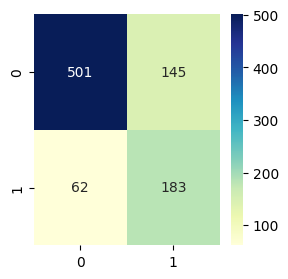

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       646
           1       0.56      0.75      0.64       245

    accuracy                           0.77       891
   macro avg       0.72      0.76      0.73       891
weighted avg       0.80      0.77      0.78       891

------------------------------------------
ROC AUC: 0.847


In [92]:
from sklearn.metrics  import confusion_matrix
from sklearn.metrics  import classification_report
from sklearn.metrics  import roc_auc_score

cm = confusion_matrix(y_val, y_pred_lr)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_val, y_pred_lr,target_names=["0","1"])
print(cr)

print("------------------------------------------")
print("ROC AUC: {:.3f}".format(roc_auc_score(y_val, lr.predict_proba(X_val)[:, 1])))

KNeighborsClassifier

Training Accuracy : 0.7945359281437125
Validation Accuracy : 0.7115600448933782


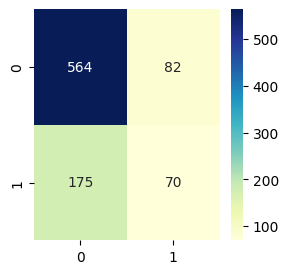

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       646
           1       0.46      0.29      0.35       245

    accuracy                           0.71       891
   macro avg       0.61      0.58      0.58       891
weighted avg       0.68      0.71      0.69       891

------------------------------------------
ROC AUC: 0.637


In [93]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(X_train,y_train)

y_pred_kn = kn.predict(X_val)

print("Training Accuracy :", kn.score(X_train, y_train))
print("Validation Accuracy :", kn.score(X_val, y_val))

cm = confusion_matrix(y_val, y_pred_kn)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_val, y_pred_kn,target_names=["0","1"])
print(cr)

print("------------------------------------------")
print("ROC AUC: {:.3f}".format(roc_auc_score(y_val, kn.predict_proba(X_val)[:, 1])))

DecisionTreeClassifier

Training Accuracy : 1.0
Validation Accuracy : 0.7037037037037037


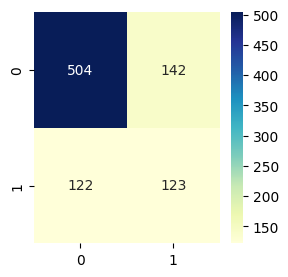

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       646
           1       0.46      0.50      0.48       245

    accuracy                           0.70       891
   macro avg       0.63      0.64      0.64       891
weighted avg       0.71      0.70      0.71       891

------------------------------------------
ROC AUC: 0.641


In [94]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_val)

print("Training Accuracy :", dt.score(X_train, y_train))
print("Validation Accuracy :", dt.score(X_val, y_val))

cm = confusion_matrix(y_val, y_pred_dt)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_val, y_pred_dt,target_names=["0","1"])
print(cr)

print("------------------------------------------")
print("ROC AUC: {:.3f}".format(roc_auc_score(y_val, dt.predict_proba(X_val)[:, 1])))

Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf = RandomForestClassifier(random_state= 100)
rf.fit(X_train, y_train)

#estimamos el modelo
y_pred_train_ac = rf.predict(X_train)
y_pred_ac = rf.predict(X_val)

#Prediccion de probabilidades del modelo
y_pred_train = rf.predict_proba(X_train)[:, 1]
y_pred = rf.predict_proba(X_val)[:, 1]

In [97]:
# Analizamos el Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

print('Accuracy en train: {0:0.4f}'. format(accuracy_score(y_train , y_pred_train_ac)))
print('Accuracy en validation: {0:0.4f}'. format(accuracy_score(y_val, y_pred_ac)))

Accuracy en train: 1.0000
Accuracy en validation: 0.7778


In [98]:
#Analizamos la curva Roc
print('AUC en train: {0:0.4f}'. format(roc_auc_score(y_train , y_pred_train)))
print('AUC en validation: {0:0.4f}'. format(roc_auc_score(y_val, y_pred)))

AUC en train: 1.0000
AUC en validation: 0.8209


Conclusion: el modelo presenta overfiting

In [99]:
all_aucs = {}

for depth in [5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 401, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=100)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1] #AUC en validation
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()


depth: 5
10 -> 0.796
30 -> 0.820
50 -> 0.825
70 -> 0.825
90 -> 0.825
110 -> 0.824
130 -> 0.824
150 -> 0.823
170 -> 0.824
190 -> 0.823
210 -> 0.823
230 -> 0.823
250 -> 0.822
270 -> 0.824
290 -> 0.823
310 -> 0.824
330 -> 0.824
350 -> 0.823
370 -> 0.824
390 -> 0.824

depth: 10
10 -> 0.796
30 -> 0.818
50 -> 0.824
70 -> 0.826
90 -> 0.829
110 -> 0.828
130 -> 0.828
150 -> 0.829
170 -> 0.829
190 -> 0.829
210 -> 0.830
230 -> 0.829
250 -> 0.829
270 -> 0.829
290 -> 0.829
310 -> 0.829
330 -> 0.828
350 -> 0.828
370 -> 0.829
390 -> 0.829

depth: 20
10 -> 0.795
30 -> 0.808
50 -> 0.813
70 -> 0.814
90 -> 0.821
110 -> 0.820
130 -> 0.820
150 -> 0.822
170 -> 0.822
190 -> 0.823
210 -> 0.821
230 -> 0.822
250 -> 0.822
270 -> 0.822
290 -> 0.823
310 -> 0.823
330 -> 0.823
350 -> 0.823
370 -> 0.824
390 -> 0.823



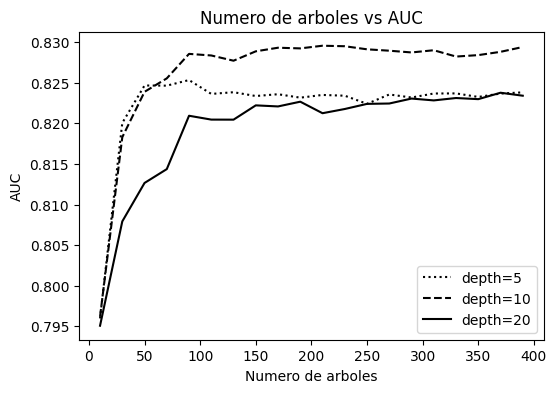

In [100]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 401, 20))

plt.plot(num_trees, all_aucs[5], label='depth=5', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='solid')
    
plt.xticks(range(0, 401, 50))
plt.legend()

plt.title('Numero de arboles vs AUC')
plt.xlabel('Numero de arboles')
plt.ylabel('AUC')

plt.savefig('AUC por profundidad.svg')

plt.show()
 #el mejor depth = 10

Optimizando el numero minimo de muestras en las hojas (min_samples_leaf)

In [101]:
all_aucs = {}

for m in [3, 5, 10]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, #profundidad optima = 10
                                    min_samples_leaf=m, random_state=100)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[m] = aucs
    print()


min_samples_leaf: 3
10 -> 0.800
30 -> 0.818
50 -> 0.821
70 -> 0.822
90 -> 0.826
110 -> 0.826
130 -> 0.826
150 -> 0.827
170 -> 0.827
190 -> 0.827

min_samples_leaf: 5
10 -> 0.802
30 -> 0.820
50 -> 0.822
70 -> 0.826
90 -> 0.828
110 -> 0.827
130 -> 0.827
150 -> 0.828
170 -> 0.827
190 -> 0.827

min_samples_leaf: 10
10 -> 0.811
30 -> 0.818
50 -> 0.822
70 -> 0.823
90 -> 0.826
110 -> 0.825
130 -> 0.826
150 -> 0.827
170 -> 0.828
190 -> 0.828



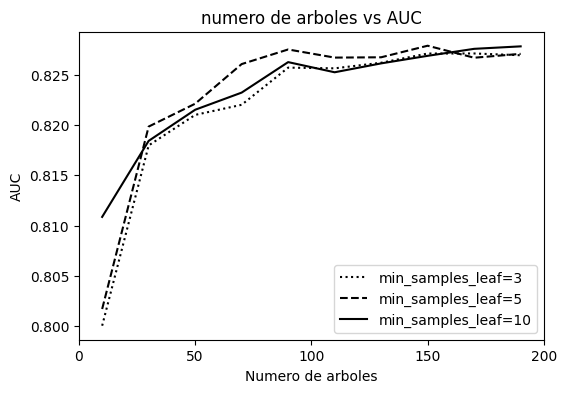

In [102]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('numero de arboles vs AUC')
plt.xlabel('Numero de arboles')
plt.ylabel('AUC')

plt.savefig('AUC_min_samples_leaf.svg')

plt.show()
#mejor min_samples_leaf = 5

Optimizando numero de arboles

In [103]:
aucs_train = []
aucs_val = []

for i in range(10, 401, 10): #entre 10 a 400 arboles
    rf = RandomForestClassifier(n_estimators = i,
                                max_depth = 10, #optimo profundidad
                                min_samples_leaf = 5, #optimo muestra hoja
                                random_state=100)
    rf.fit(X_train, y_train)

    y_pred_train = rf.predict_proba(X_train)[:, 1]
    y_pred_val = rf.predict_proba(X_val)[:, 1]

    auc_train = roc_auc_score(y_train, y_pred_train)
    auc_val = roc_auc_score(y_val, y_pred_val)
    print('%s -> %.3f' % (i, auc_val))
    aucs_train.append(auc_train)
    aucs_val.append(auc_val)

#numero optimo n_estimators = 200

10 -> 0.802
20 -> 0.813
30 -> 0.820
40 -> 0.821
50 -> 0.822
60 -> 0.823
70 -> 0.826
80 -> 0.826
90 -> 0.828
100 -> 0.827
110 -> 0.827
120 -> 0.826
130 -> 0.827
140 -> 0.828
150 -> 0.828
160 -> 0.827
170 -> 0.827
180 -> 0.827
190 -> 0.827
200 -> 0.827
210 -> 0.827
220 -> 0.828
230 -> 0.828
240 -> 0.828
250 -> 0.828
260 -> 0.828
270 -> 0.829
280 -> 0.829
290 -> 0.829
300 -> 0.829
310 -> 0.828
320 -> 0.828
330 -> 0.828
340 -> 0.829
350 -> 0.829
360 -> 0.829
370 -> 0.829
380 -> 0.829
390 -> 0.829
400 -> 0.829


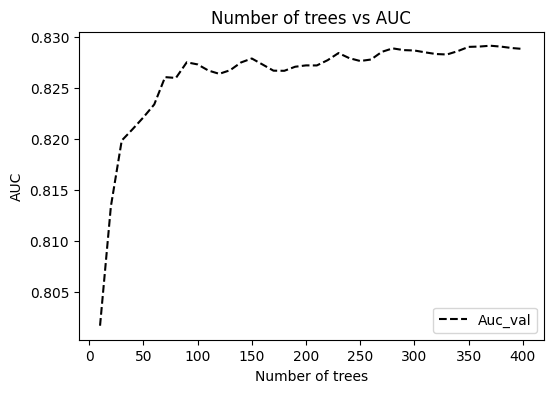

In [104]:
plt.figure(figsize=(6, 4))

#plt.plot(range(10, 401, 10), aucs_train, color='black', label = "Auc_train")
plt.plot(range(10, 401, 10), aucs_val, color='black', linestyle='dashed', label = "Auc_val")
plt.xticks(range(0, 401, 50))
#plt.ylim(0.5,1)
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('AUC Arboles.svg')

plt.show()
#optimo arboles 150

Entrenando el mejor modelo 

In [105]:
rf = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_leaf=5 , random_state=100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=150,
                       random_state=100)

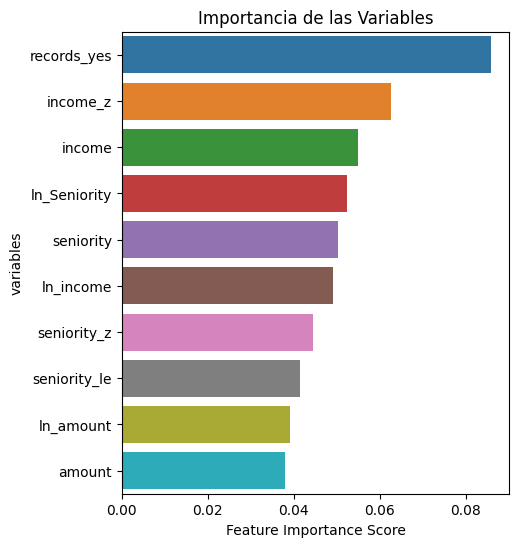

In [106]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores[0:10]
#Graficamos la importamcia de las carcateristicas
plt.figure(figsize= (5,6))

sns.barplot(x=feature_scores[0:10], y=feature_scores[0:10].index)
plt.xlabel('Feature Importance Score')
plt.ylabel('variables')
plt.title("Importancia de las Variables")
plt.show()

In [107]:
y_pred_rf = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred_rf)

0.8278953686737854

Grafico de la AUC

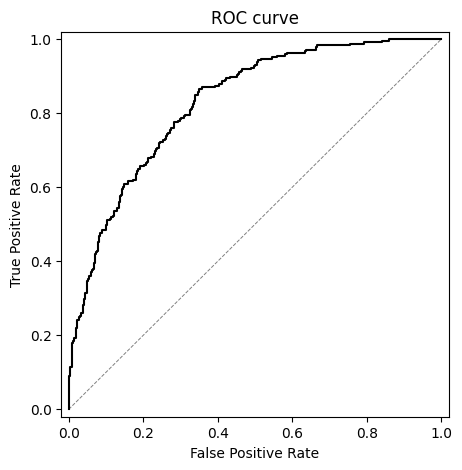

In [108]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(5, 5))

fpr, tpr, thresholds = roc_curve(y_val, y_pred_rf)
plt.plot(fpr, tpr, color='black')

plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

Puntos de corte

In [109]:
sensibilidad = tpr
especificidad =1- fpr
#(especificidad)

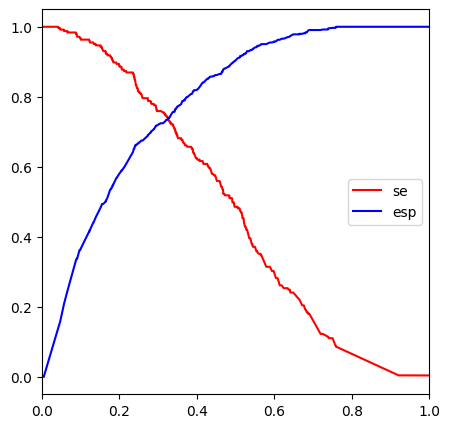

In [110]:
plt.figure(figsize = (5,5))
plt.plot(thresholds, sensibilidad, color='red', label = "se")
plt.plot(thresholds, especificidad, color='blue', label = "esp")
plt.xlim(0,1)
plt.legend()

In [111]:
df_corte = pd.DataFrame({"sensibilidad": sensibilidad,
              "especificidad": especificidad,
              "punto_corte": thresholds})
df_corte
df_corte["distancia"] = np.abs(df_corte["sensibilidad"] - df_corte["especificidad"])
df_corte.sort_values("distancia")

,sensibilidad,especificidad,punto_corte,distancia
152,0.738776,0.738390,0.326181,0.000385
153,0.738776,0.735294,0.325410,0.003481
151,0.734694,0.738390,0.326888,0.003696
150,0.734694,0.739938,0.327125,0.005244
154,0.742857,0.735294,0.324430,0.007563
...,...,...,...,...
3,0.085714,0.998452,0.759632,0.912738
2,0.085714,1.000000,0.760379,0.914286
1,0.004082,1.000000,0.920771,0.995918
0,0.000000,1.000000,1.920771,1.000000


In [112]:
punto_corte = 0.33

Prediccion en la base de Test

In [113]:
y_pred_test =  rf.predict_proba(X_test)[:, 1]

In [114]:
#prtediccion hard
print(f"punto de corte {round(punto_corte,3)}")
y_test_prob = []

for i in range(len(y_test)):
  if y_pred_test[i] > punto_corte:
    y_test_prob.append(1)
  else:
    y_test_prob.append(0)

punto de corte 0.33


Matriz de confusion en test

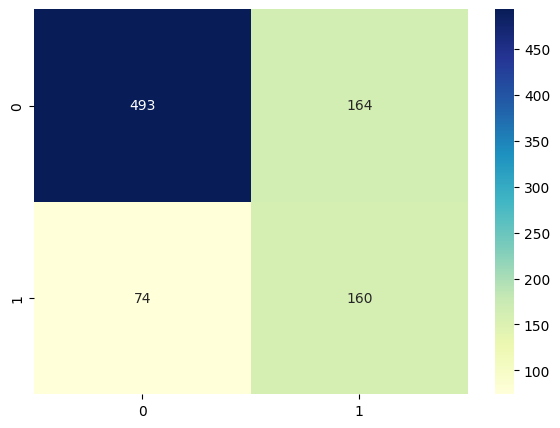

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       657
           1       0.49      0.68      0.57       234

    accuracy                           0.73       891
   macro avg       0.68      0.72      0.69       891
weighted avg       0.77      0.73      0.74       891



In [115]:
#Evlauar ;las metricas
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_prob)

plt.rcParams['figure.figsize'] = (7, 5)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.6g')
plt.show()
#Mostramos  principales indicadores

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_prob)) #ojo con el Recall

In [116]:
print('AUC en validation: {0:0.4f}'. format(roc_auc_score(y_test, y_pred_test)))

AUC en validation: 0.8060
